In [140]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import datetime

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [141]:
df = pd.read_csv('./data/order_data.csv',parse_dates=['Order Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25048 entries, 0 to 25047
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    25048 non-null  datetime64[ns]
 1   Order Number  25048 non-null  int64         
 2   Index         25048 non-null  int64         
 3   Item Name     25048 non-null  object        
 4   Price         25048 non-null  int64         
 5   Quantity      25048 non-null  int64         
 6   Total         25048 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.3+ MB


In [142]:
df=df.sort_values(['Order Date'])
df

,Order Date,Order Number,Index,Item Name,Price,Quantity,Total
0,2019-05-07 08:17:29,1,4,Rice and Curry Chicken,200,1,200
1,2019-05-07 08:22:21,2,4,Rice and Curry Chicken,200,1,200
2,2019-05-07 08:36:31,3,1,Rice and Curry Vegetable,170,2,340
3,2019-05-07 09:20:26,4,2,Rice and Curry Egg,190,3,570
4,2019-05-07 09:33:18,5,9,Egg Biriyani,250,1,250
...,...,...,...,...,...,...,...
25043,2020-09-17 17:49:51,25044,8,Chicken Kottu,280,2,560
25044,2020-09-17 18:02:04,25045,3,Rice and Curry Fish,200,2,400
25045,2020-09-17 18:38:10,25046,6,Chicken Rice,320,1,320
25046,2020-09-17 18:42:06,25047,4,Rice and Curry Chicken,200,2,400


In [143]:
df1=df.groupby(['Item Name']).count().sort_values("Quantity", ascending=False)
df1

,Order Date,Order Number,Index,Price,Quantity,Total
Item Name,,,,,,
Rice and Curry Chicken,5123,5123,5123,5123,5123,5123
Chicken Rice,3773,3773,3773,3773,3773,3773
Chicken Kottu,3735,3735,3735,3735,3735,3735
Egg Rice,2490,2490,2490,2490,2490,2490
Egg Kottu,2485,2485,2485,2485,2485,2485
Rice and Curry Fish,2240,2240,2240,2240,2240,2240
Rice and Curry Egg,1683,1683,1683,1683,1683,1683
Chicken Biriyani,1472,1472,1472,1472,1472,1472
Egg Biriyani,1045,1045,1045,1045,1045,1045


In [144]:
max_index=df1.index[0]
max_index

'Rice and Curry Chicken'

In [145]:
df=df[df["Item Name"]==max_index]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5123 entries, 0 to 25047
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    5123 non-null   datetime64[ns]
 1   Order Number  5123 non-null   int64         
 2   Index         5123 non-null   int64         
 3   Item Name     5123 non-null   object        
 4   Price         5123 non-null   int64         
 5   Quantity      5123 non-null   int64         
 6   Total         5123 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 320.2+ KB


In [146]:
df.head()

,Order Date,Order Number,Index,Item Name,Price,Quantity,Total
0,2019-05-07 08:17:29,1,4,Rice and Curry Chicken,200,1,200
1,2019-05-07 08:22:21,2,4,Rice and Curry Chicken,200,1,200
5,2019-05-07 09:35:42,6,4,Rice and Curry Chicken,200,3,600
7,2019-05-07 09:57:10,8,4,Rice and Curry Chicken,200,2,400
14,2019-05-07 11:14:25,15,4,Rice and Curry Chicken,200,2,400


In [147]:
count=df.groupby(by=df["Order Date"].dt.date).count()
count=count[["Order Date"]]
count.rename(columns={"Order Date":"Count"}, inplace=True)
count

,Count
Order Date,
2019-05-07,13
2019-05-08,7
2019-05-09,7
2019-05-10,10
2019-05-11,9
...,...
2020-09-13,9
2020-09-14,6
2020-09-15,10


In [148]:
sum=df.groupby(by=df["Order Date"].dt.date).sum()

sum=sum[["Quantity"]]
sum.rename(columns={"Quantity":"Total Quantity"}, inplace=True)
sum

,Total Quantity
Order Date,
2019-05-07,23
2019-05-08,11
2019-05-09,14
2019-05-10,14
2019-05-11,12
...,...
2020-09-13,20
2020-09-14,7
2020-09-15,18


In [149]:
dataset=count.join(sum)
dataset["Total Count"]=dataset["Count"]*dataset["Total Quantity"]
dataset

,Count,Total Quantity,Total Count
Order Date,,,
2019-05-07,13,23,299
2019-05-08,7,11,77
2019-05-09,7,14,98
2019-05-10,10,14,140
2019-05-11,9,12,108
...,...,...,...
2020-09-13,9,20,180
2020-09-14,6,7,42
2020-09-15,10,18,180


In [150]:
dataset=dataset.iloc[200:900,:]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019CBAB13D88>,
      dtype=object)

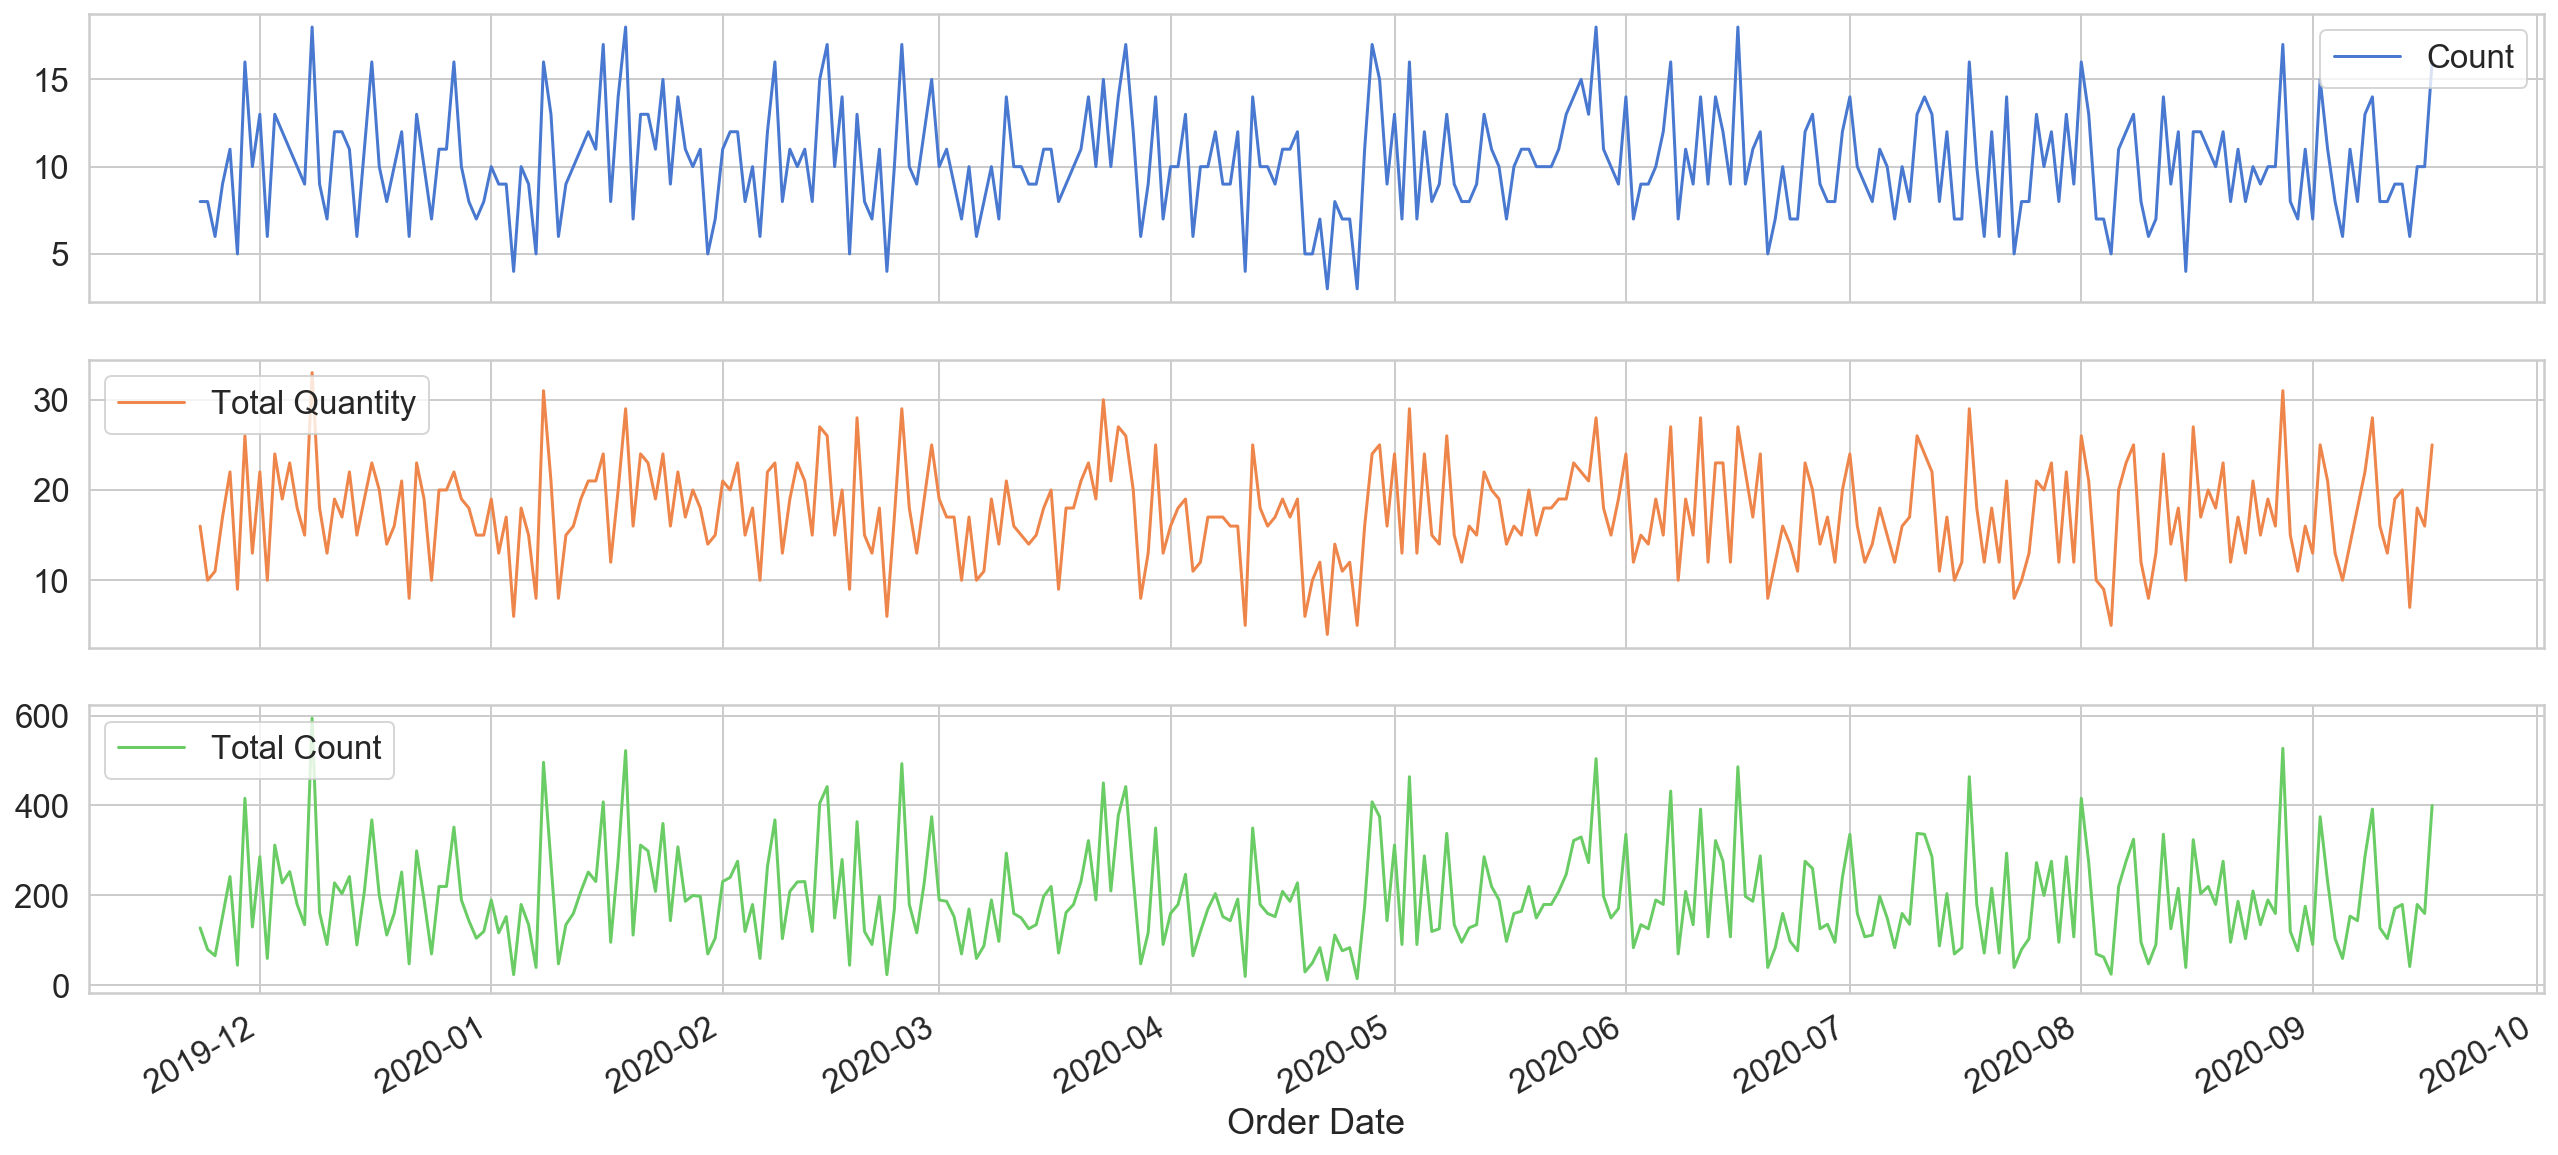

In [151]:
dataset.plot(subplots=True)

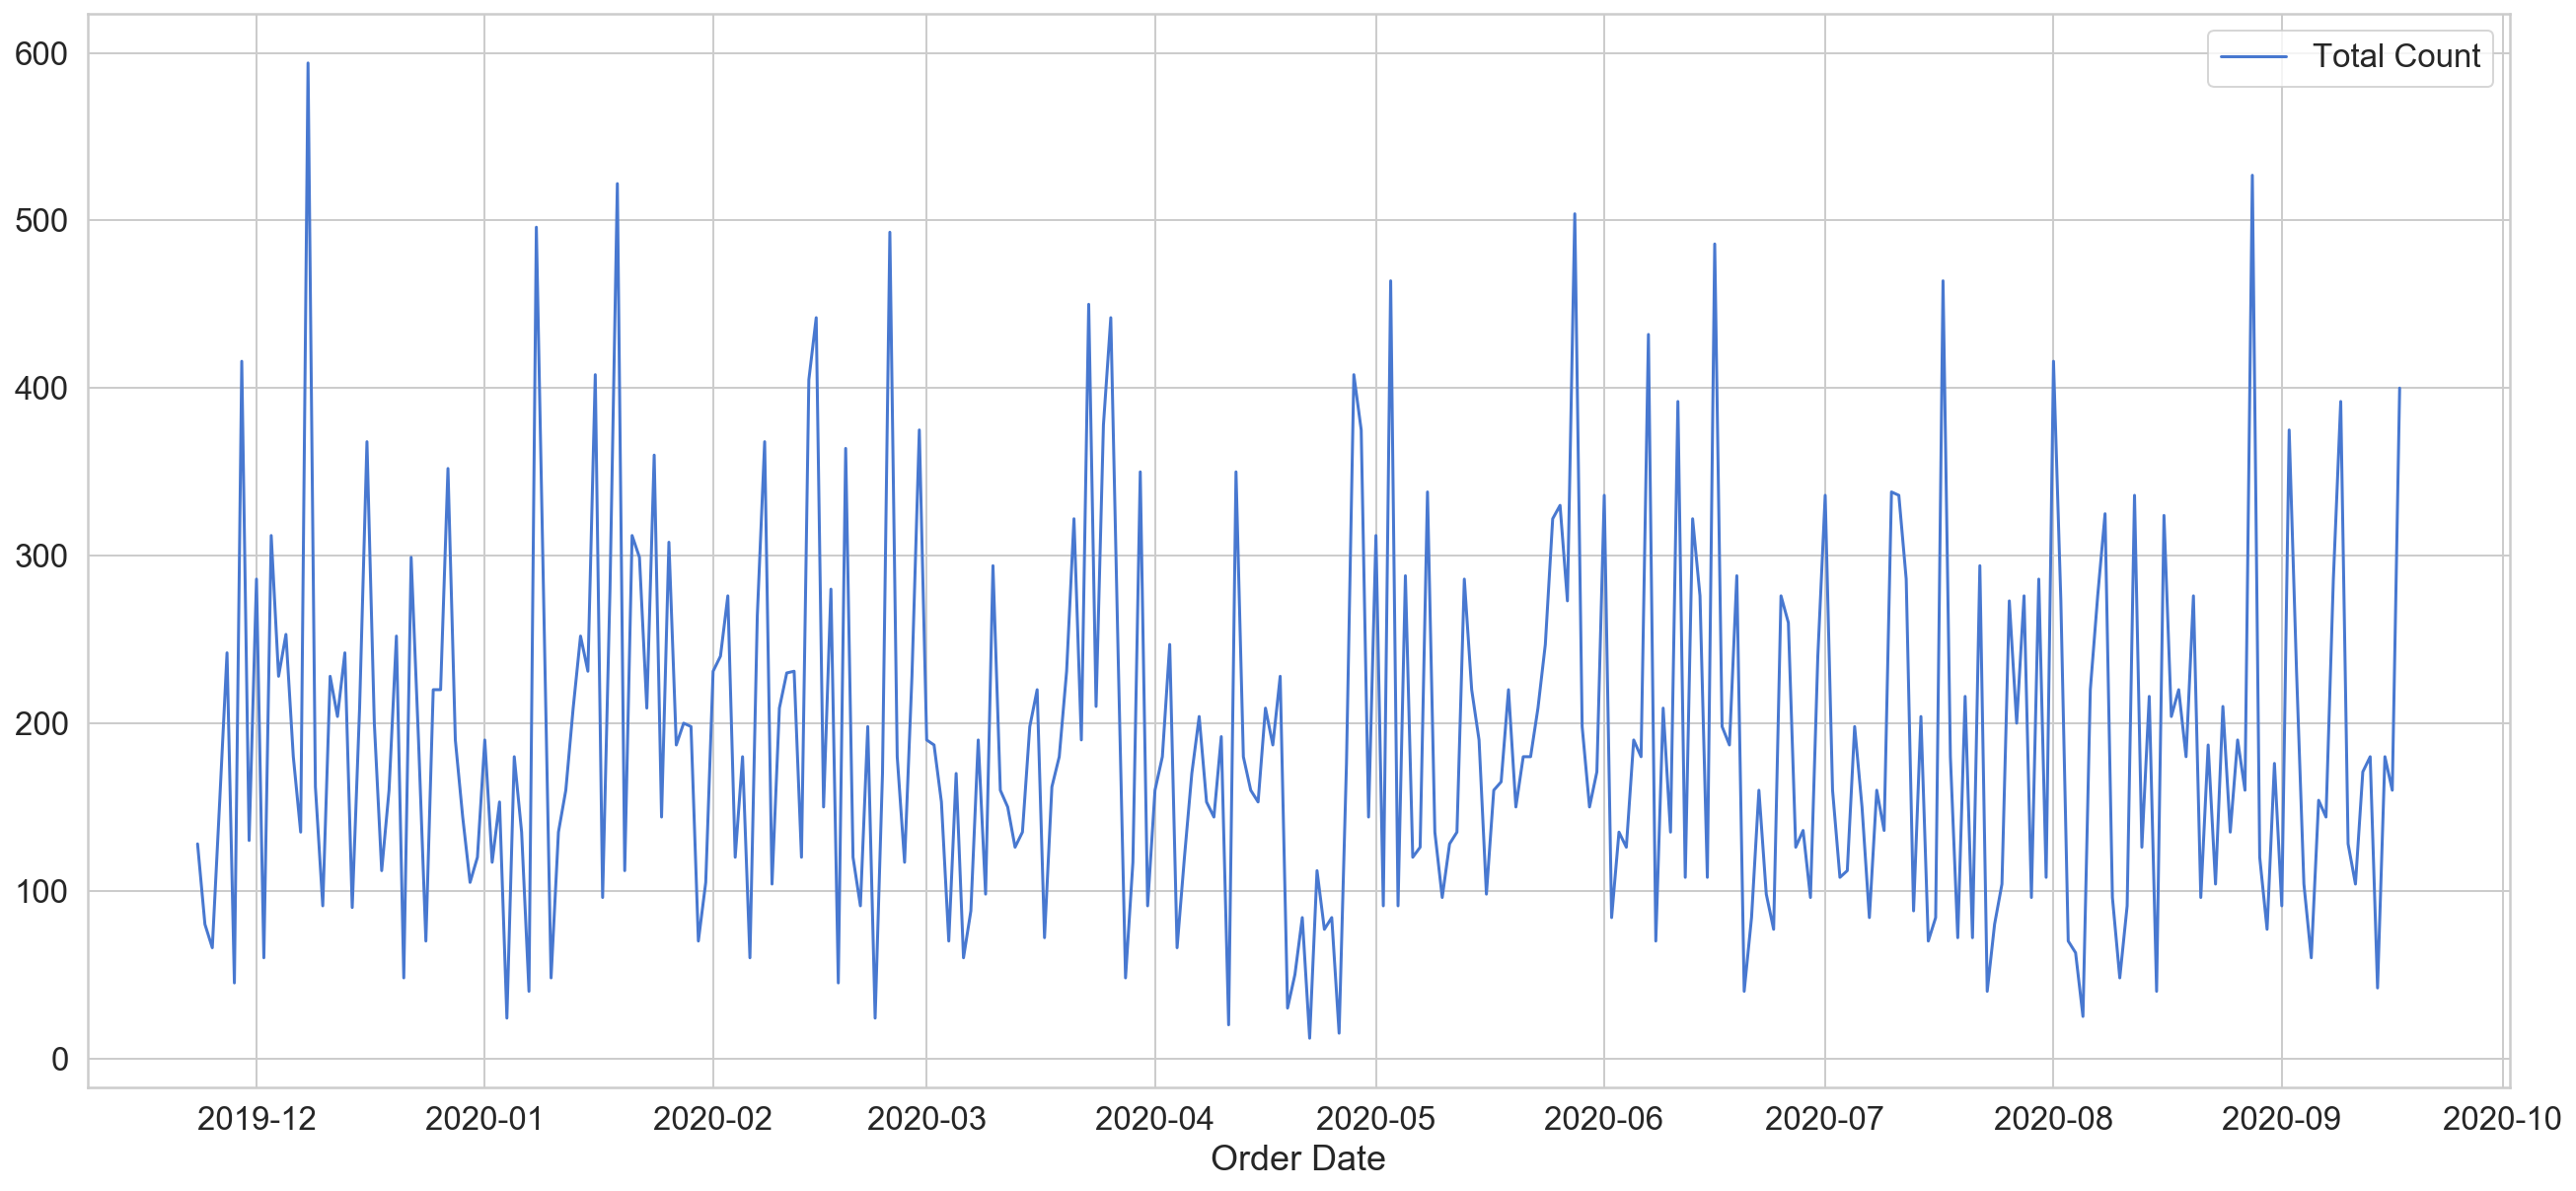

In [152]:
dataset.plot(y="Total Count")

In [153]:
df=dataset[["Total Count"]]
df

,Total Count
Order Date,
2019-11-23,128
2019-11-24,80
2019-11-25,66
2019-11-26,153
2019-11-27,242
...,...
2020-09-13,180
2020-09-14,42
2020-09-15,180


In [154]:
df=df.tail(250)
df

,Total Count
Order Date,
2020-01-12,160
2020-01-13,209
2020-01-14,252
2020-01-15,231
2020-01-16,408
...,...
2020-09-13,180
2020-09-14,42
2020-09-15,180


In [155]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

200 50


In [156]:
f_columns = ['Total Count']

scaler = MinMaxScaler(feature_range=(0,1))

scaler = scaler.fit(train[f_columns].to_numpy())

train.loc[:, f_columns] = scaler.transform(train[f_columns].to_numpy())

test.loc[:, f_columns] = scaler.transform(test[f_columns].to_numpy())

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [157]:
train

,Total Count
Order Date,
2020-01-12,0.290196
2020-01-13,0.386275
2020-01-14,0.470588
2020-01-15,0.429412
2020-01-16,0.776471
...,...
2020-07-25,0.180392
2020-07-26,0.511765
2020-07-27,0.368627


In [158]:
test

,Total Count
Order Date,
2020-07-30,0.537255
2020-07-31,0.188235
2020-08-01,0.792157
2020-08-02,0.511765
2020-08-03,0.113725
2020-08-04,0.100000
2020-08-05,0.025490
2020-08-06,0.407843
2020-08-07,0.517647


In [159]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences.iloc[i:end_ix, :].values, sequences.iloc[end_ix:out_end_ix, :].values
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [160]:
n_steps_in, n_steps_out = 28, 7

X_train, y_train = split_sequences(train, n_steps_in, n_steps_out)
X_test, y_test = split_sequences(test, n_steps_in, n_steps_out)

# the dataset knows the number of features.
n_features = X_train.shape[2]

n_features

1

In [161]:
X_train.shape

(166, 28, 1)

In [162]:
y_train.shape

(166, 7, 1)

In [163]:
X_test.shape

(16, 28, 1)

In [164]:
y_test.shape

(16, 7, 1)

In [165]:
# define model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(200, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(tf.keras.layers.RepeatVector(n_steps_out))
model.add(tf.keras.layers.LSTM(200, activation='relu', return_sequences=True))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(100, activation='relu')))
model.add(tf.keras.layers.Dropout(0.3))
# model.add(tf.keras.layers.LSTM(250, activation='relu', return_sequences=True))
# model.add(tf.keras.layers.LSTM(250, activation='relu', return_sequences=True))
# model.add(tf.keras.layers.Dropout(0.3))
# model.add(tf.keras.layers.LSTM(250, activation='relu', return_sequences=True))
# model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features)))
model.compile(optimizer='adam', loss='mse')

In [166]:
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2)

Epoch 1/200
5/5 [==============================] - 1s 265ms/step - loss: 0.1556 - val_loss: 0.0733
Epoch 2/200
5/5 [==============================] - 0s 71ms/step - loss: 0.0821 - val_loss: 0.0548
Epoch 3/200
5/5 [==============================] - 0s 65ms/step - loss: 0.0654 - val_loss: 0.0461
Epoch 4/200
5/5 [==============================] - 0s 81ms/step - loss: 0.0630 - val_loss: 0.0431
Epoch 5/200
5/5 [==============================] - 0s 71ms/step - loss: 0.0584 - val_loss: 0.0443
Epoch 6/200
5/5 [==============================] - 0s 70ms/step - loss: 0.0564 - val_loss: 0.0421
Epoch 7/200
5/5 [==============================] - 0s 75ms/step - loss: 0.0549 - val_loss: 0.0407
Epoch 8/200
5/5 [==============================] - 0s 71ms/step - loss: 0.0549 - val_loss: 0.0402
Epoch 9/200
5/5 [==============================] - 0s 73ms/step - loss: 0.0527 - val_loss: 0.0407
Epoch 10/200
5/5 [==============================] - 0s 69ms/step - loss: 0.0529 - val_loss: 0.0409
Epoch 11/200
5/5 [

In [167]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 200)               161600    
_________________________________________________________________
repeat_vector_3 (RepeatVecto (None, 7, 200)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 7, 200)            320800    
_________________________________________________________________
dropout (Dropout)            (None, 7, 200)            0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 7, 100)            20100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 100)            0         
_________________________________________________________________
time_distributed_7 (TimeDist (None, 7, 1)             

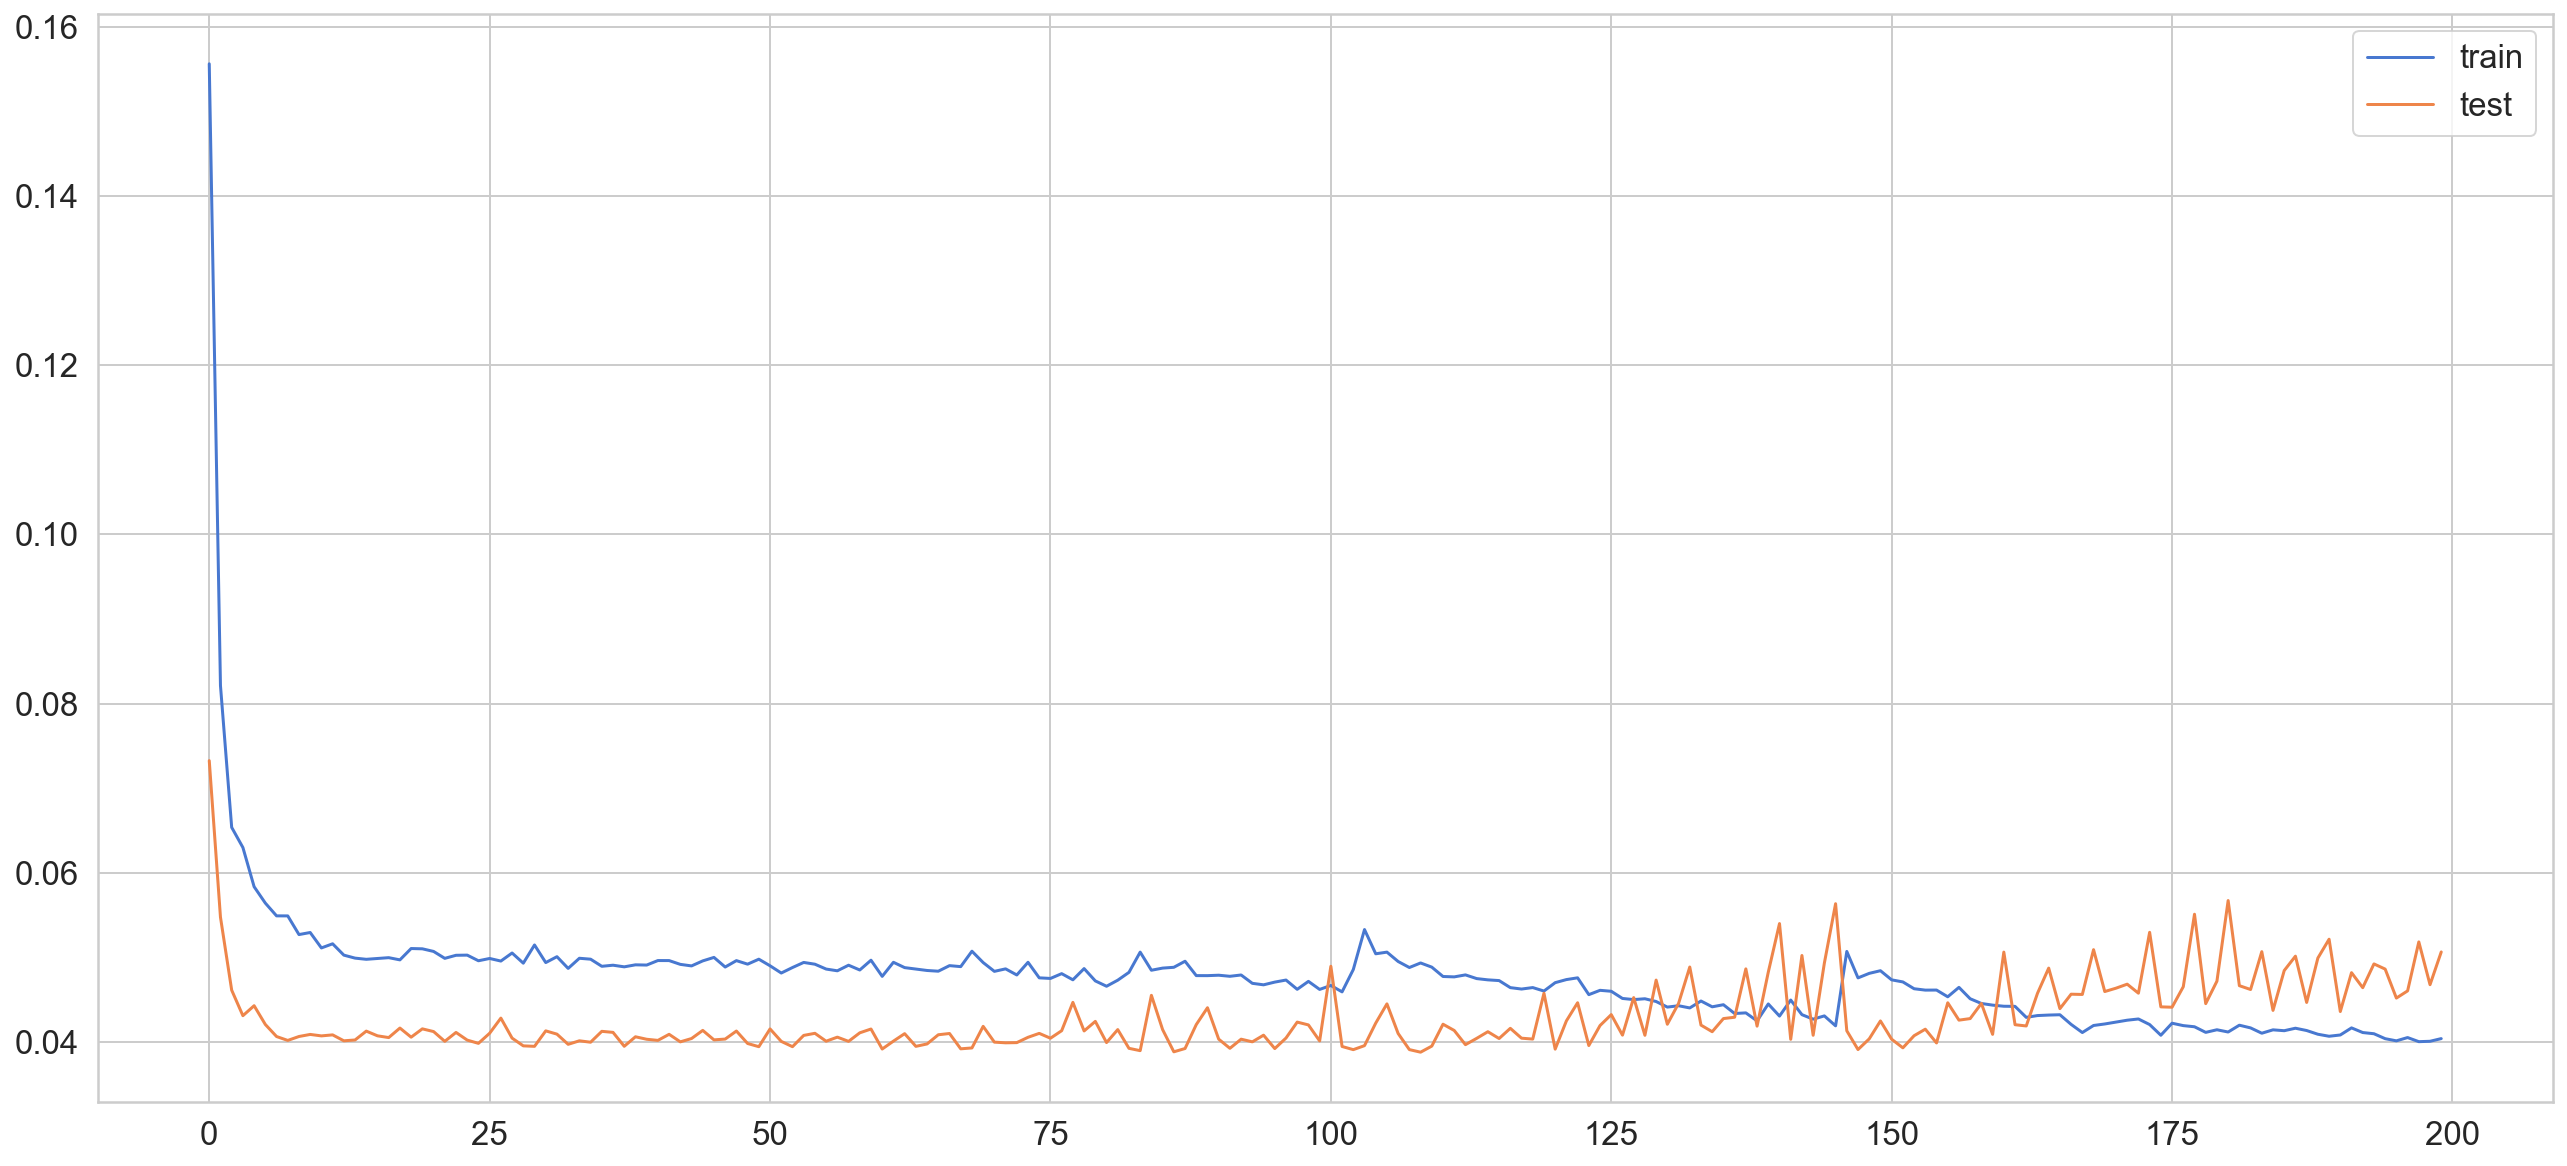

In [168]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [169]:
y_pred = model.predict(X_test)

In [170]:
def inverse_transform(arr):
    a=[]
    for i in arr:
        b=scaler.inverse_transform(i)
        a.append(b.tolist())
    return np.array(a)

In [171]:
X_test_inv = inverse_transform(X_test)
y_test_inv = inverse_transform(y_test)
y_pred_inv = inverse_transform(y_pred)

In [172]:
y_test_inv[0]

array([[160.],
       [527.],
       [120.],
       [ 77.],
       [176.],
       [ 91.],
       [375.]])

In [173]:
y_pred_inv[0]

array([[157.51596069],
       [156.02856445],
       [154.93864441],
       [154.14712524],
       [153.72351074],
       [153.41317749],
       [153.16114807]])

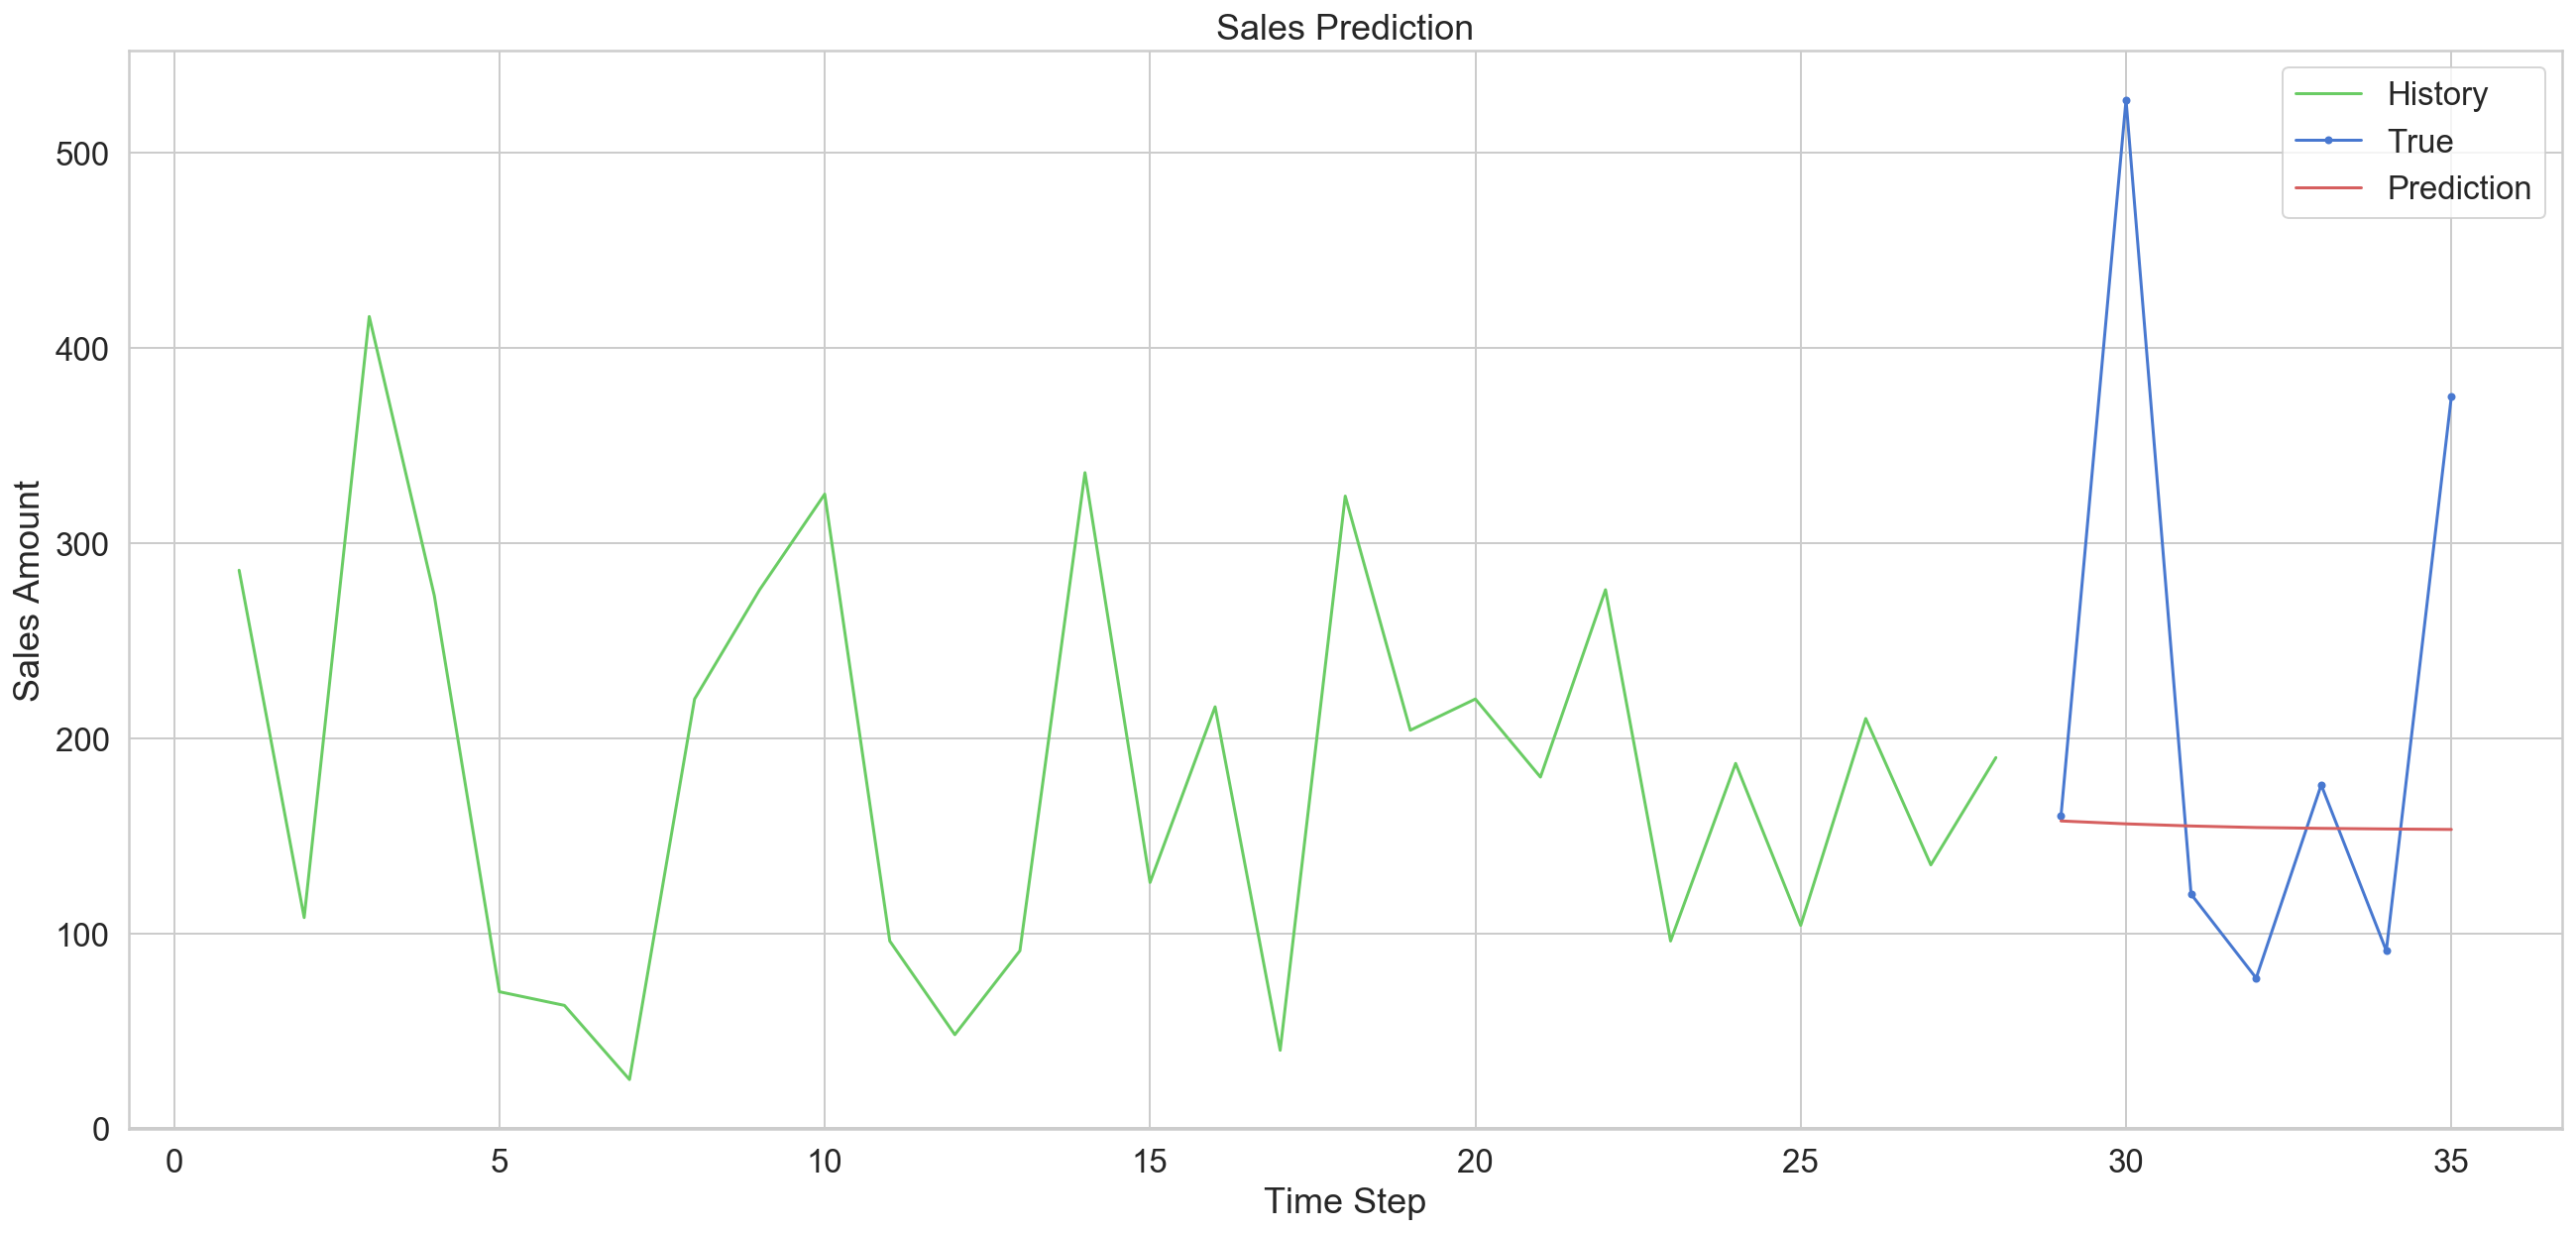

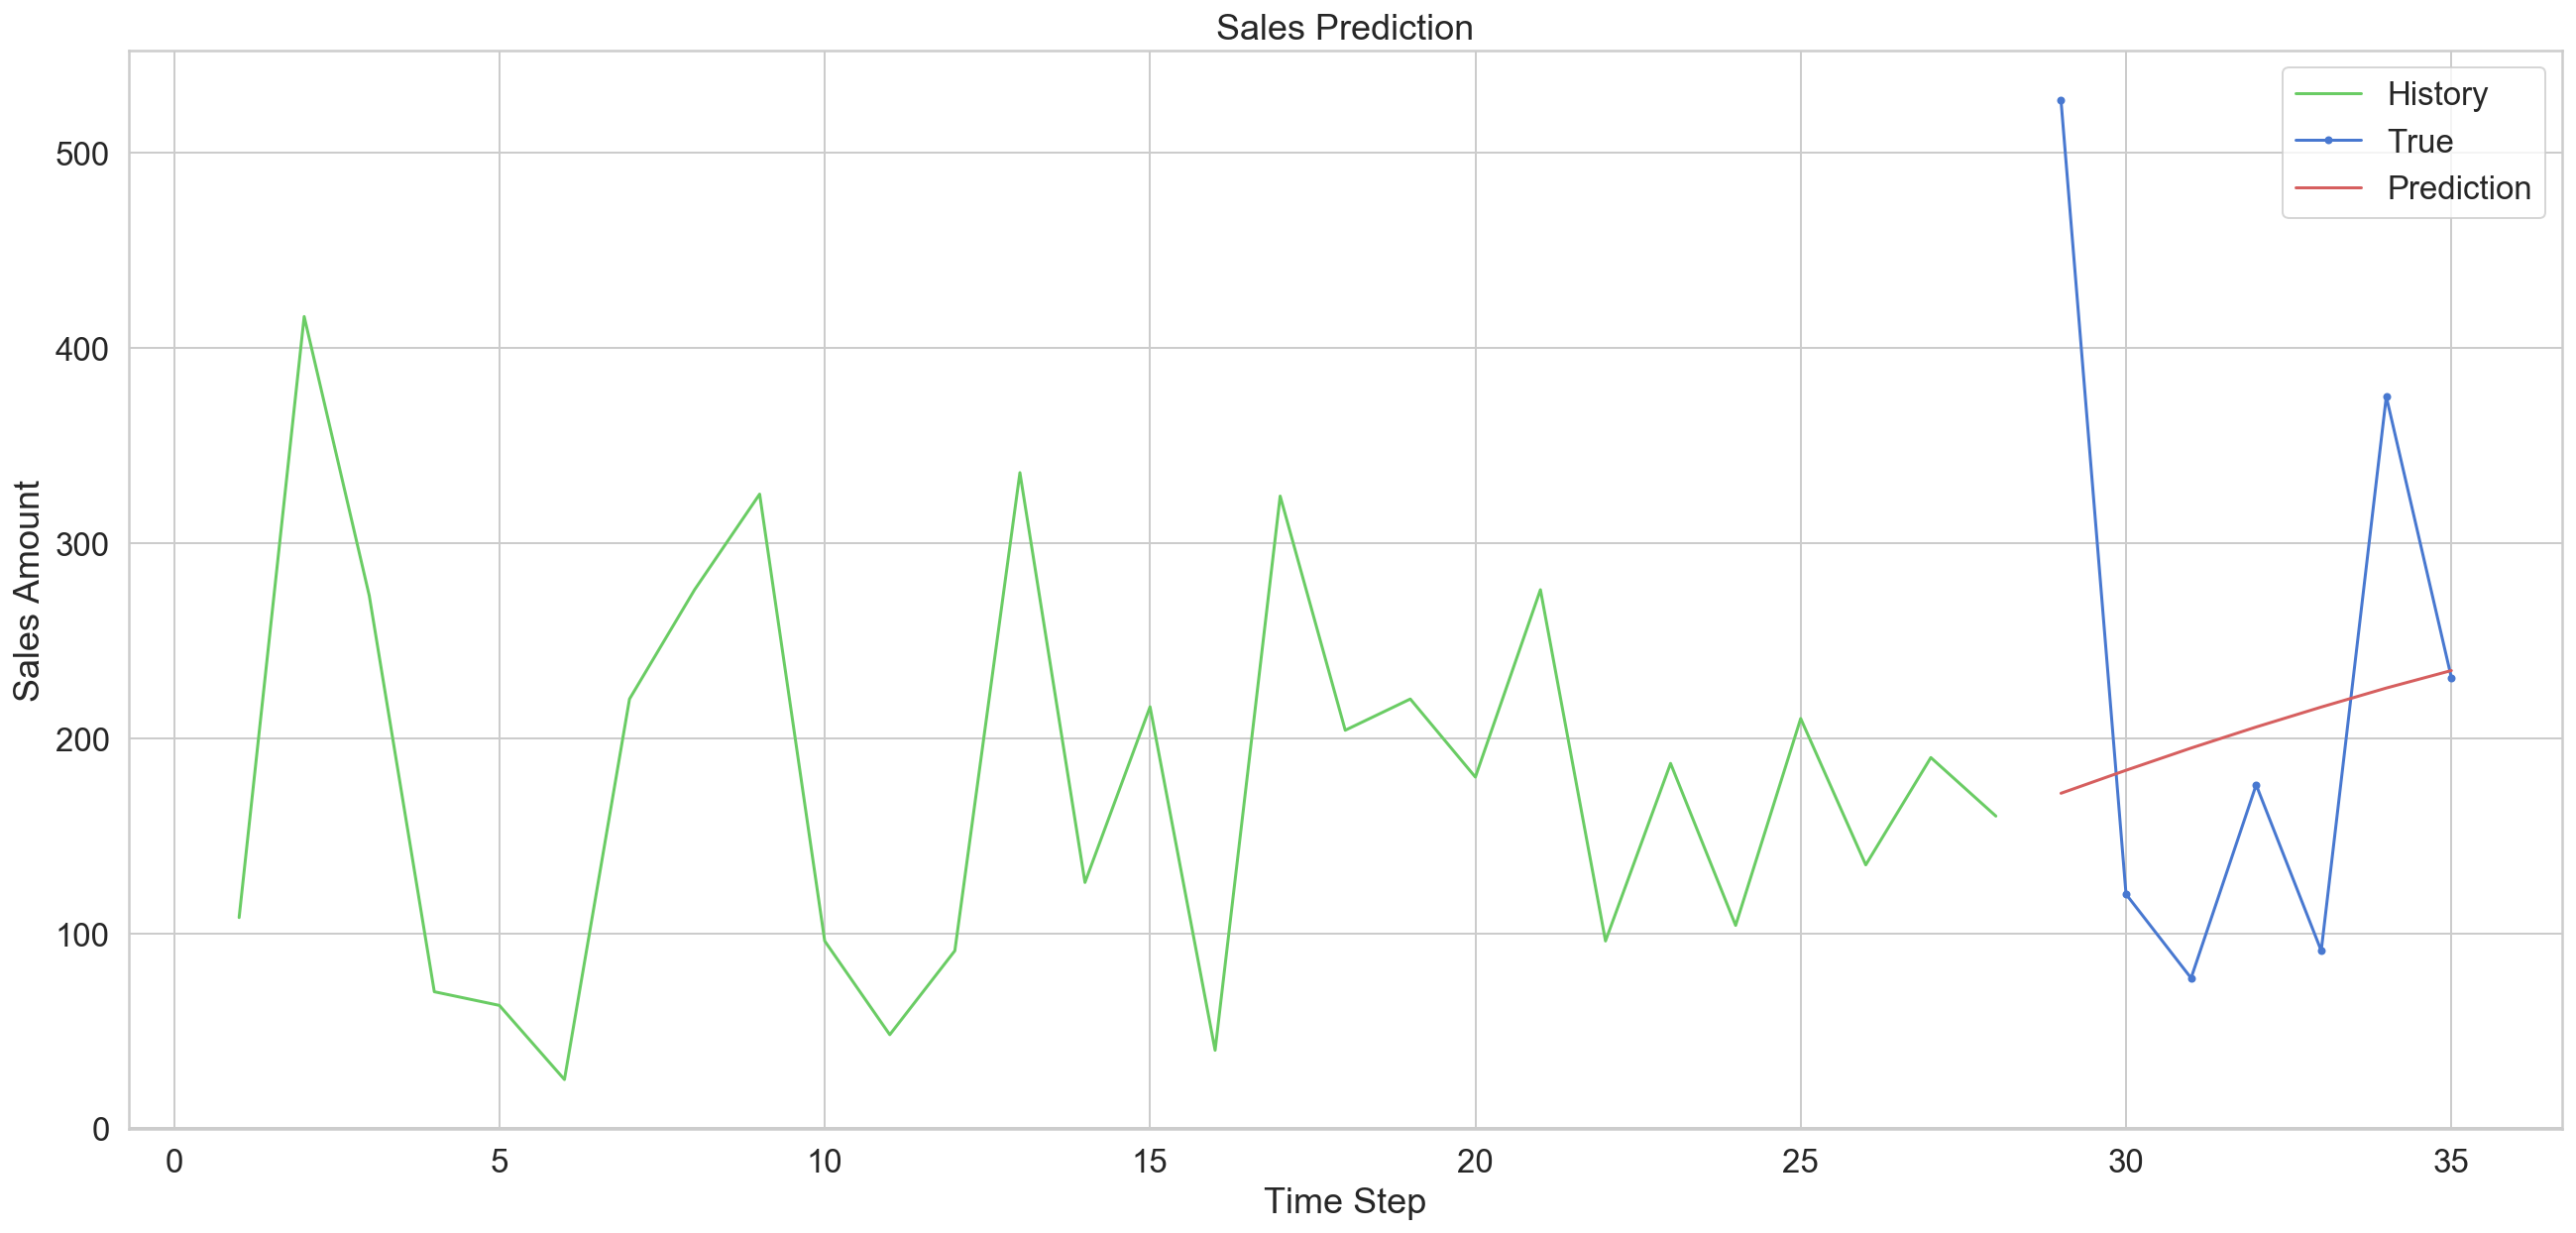

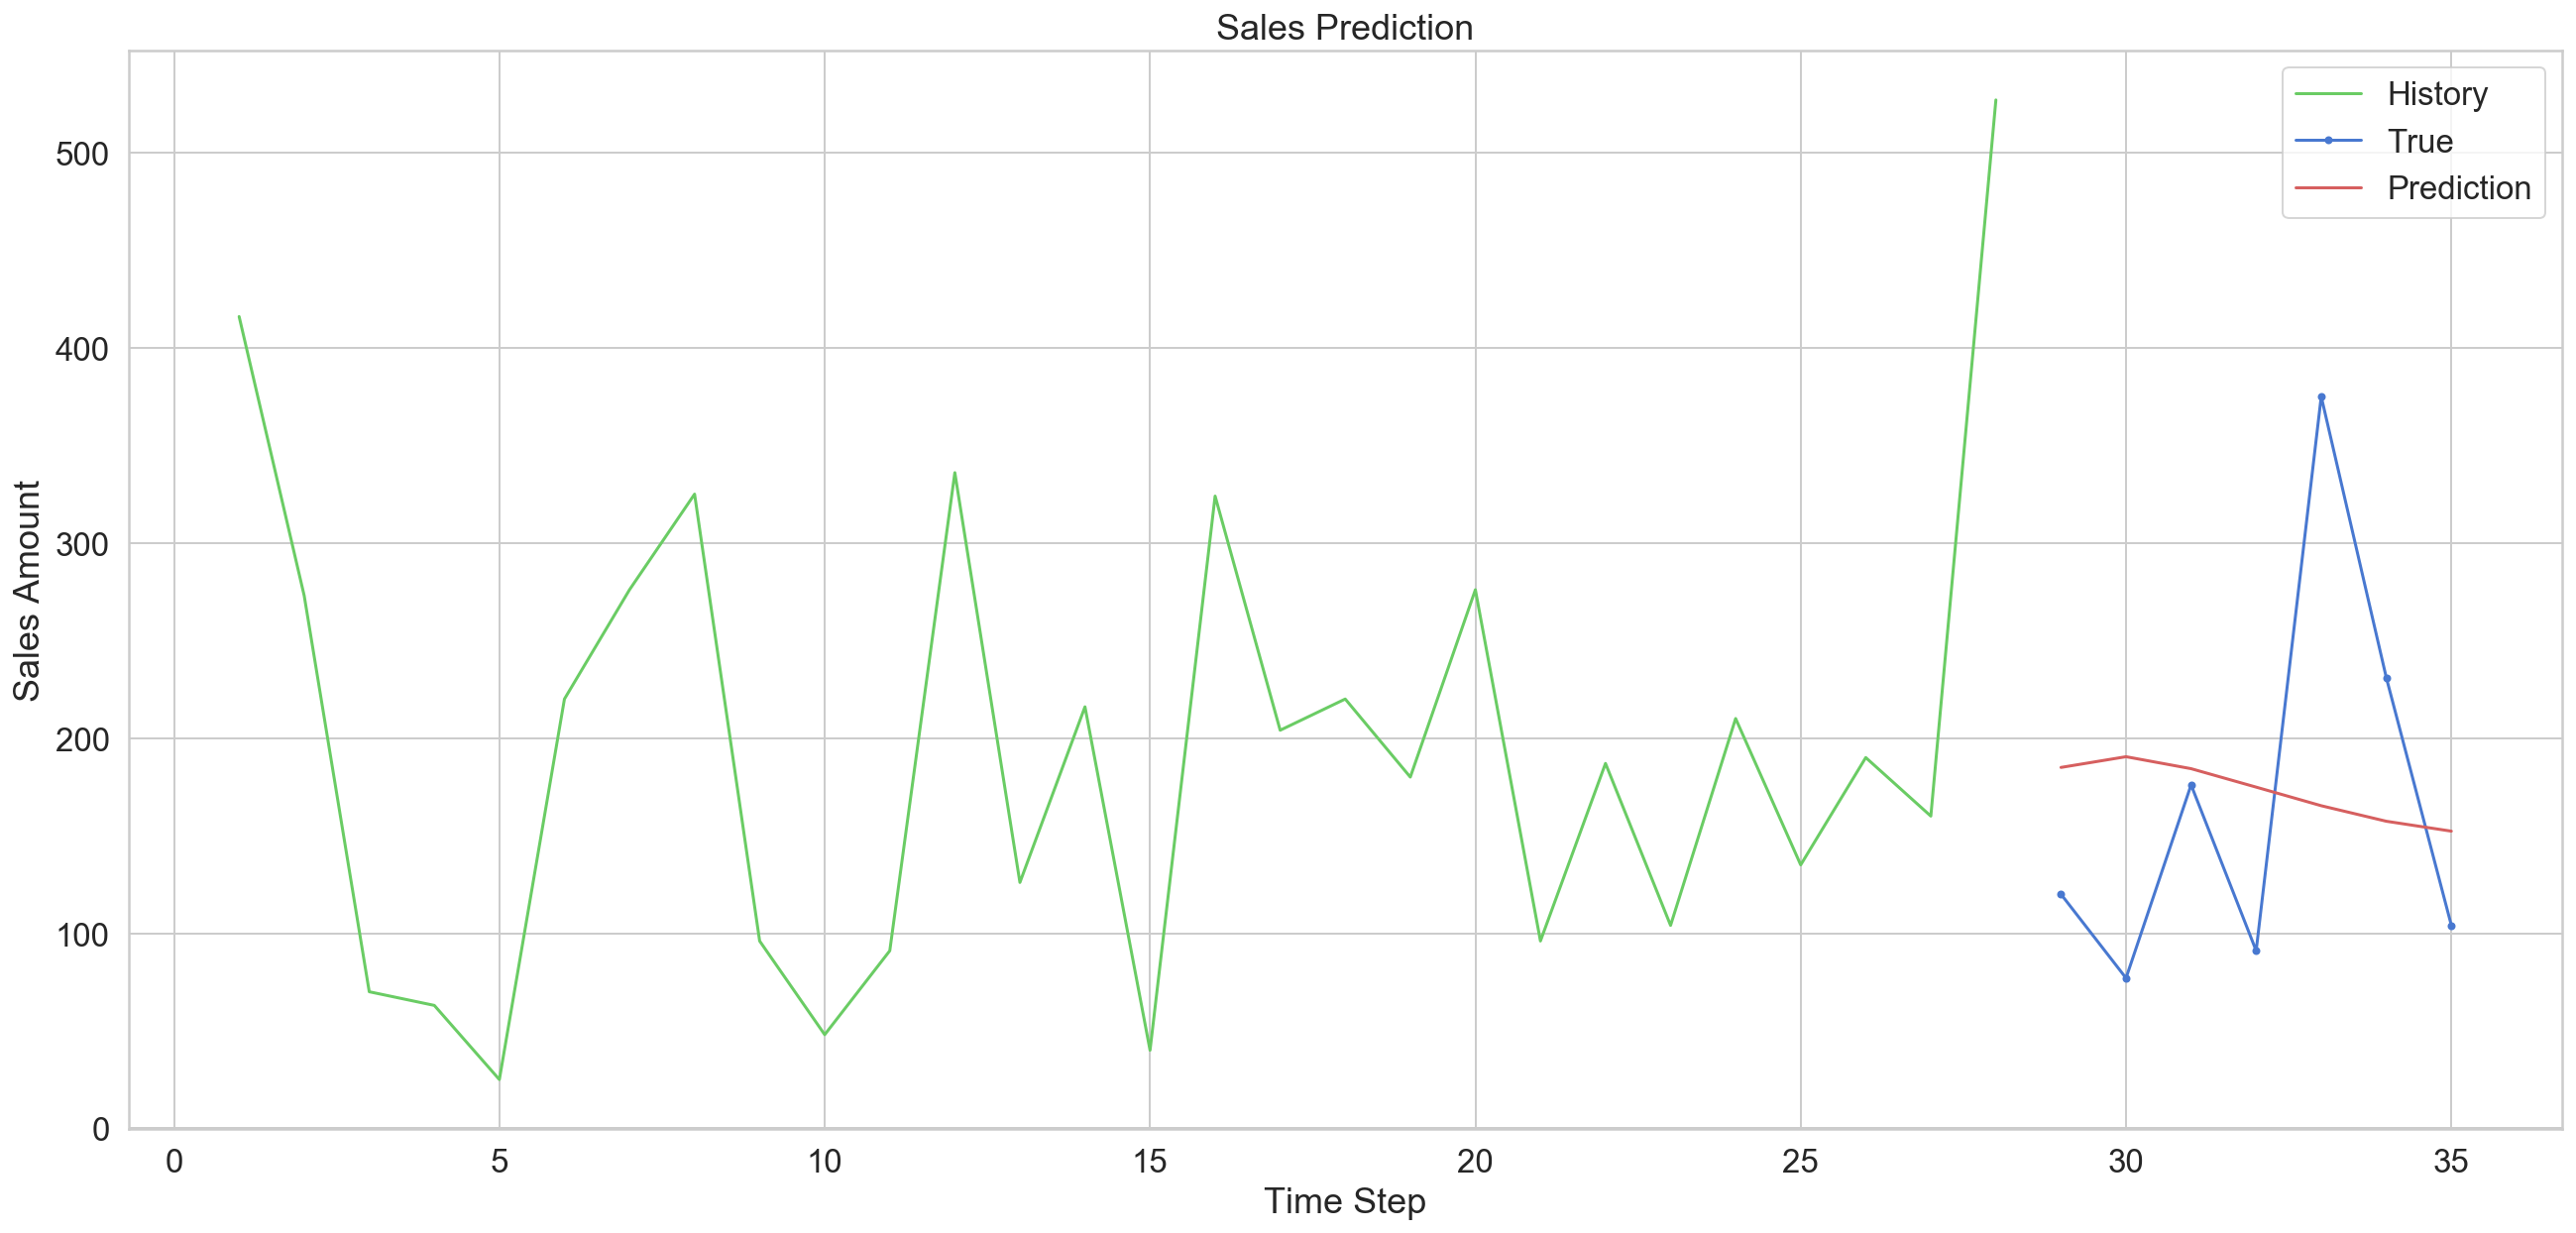

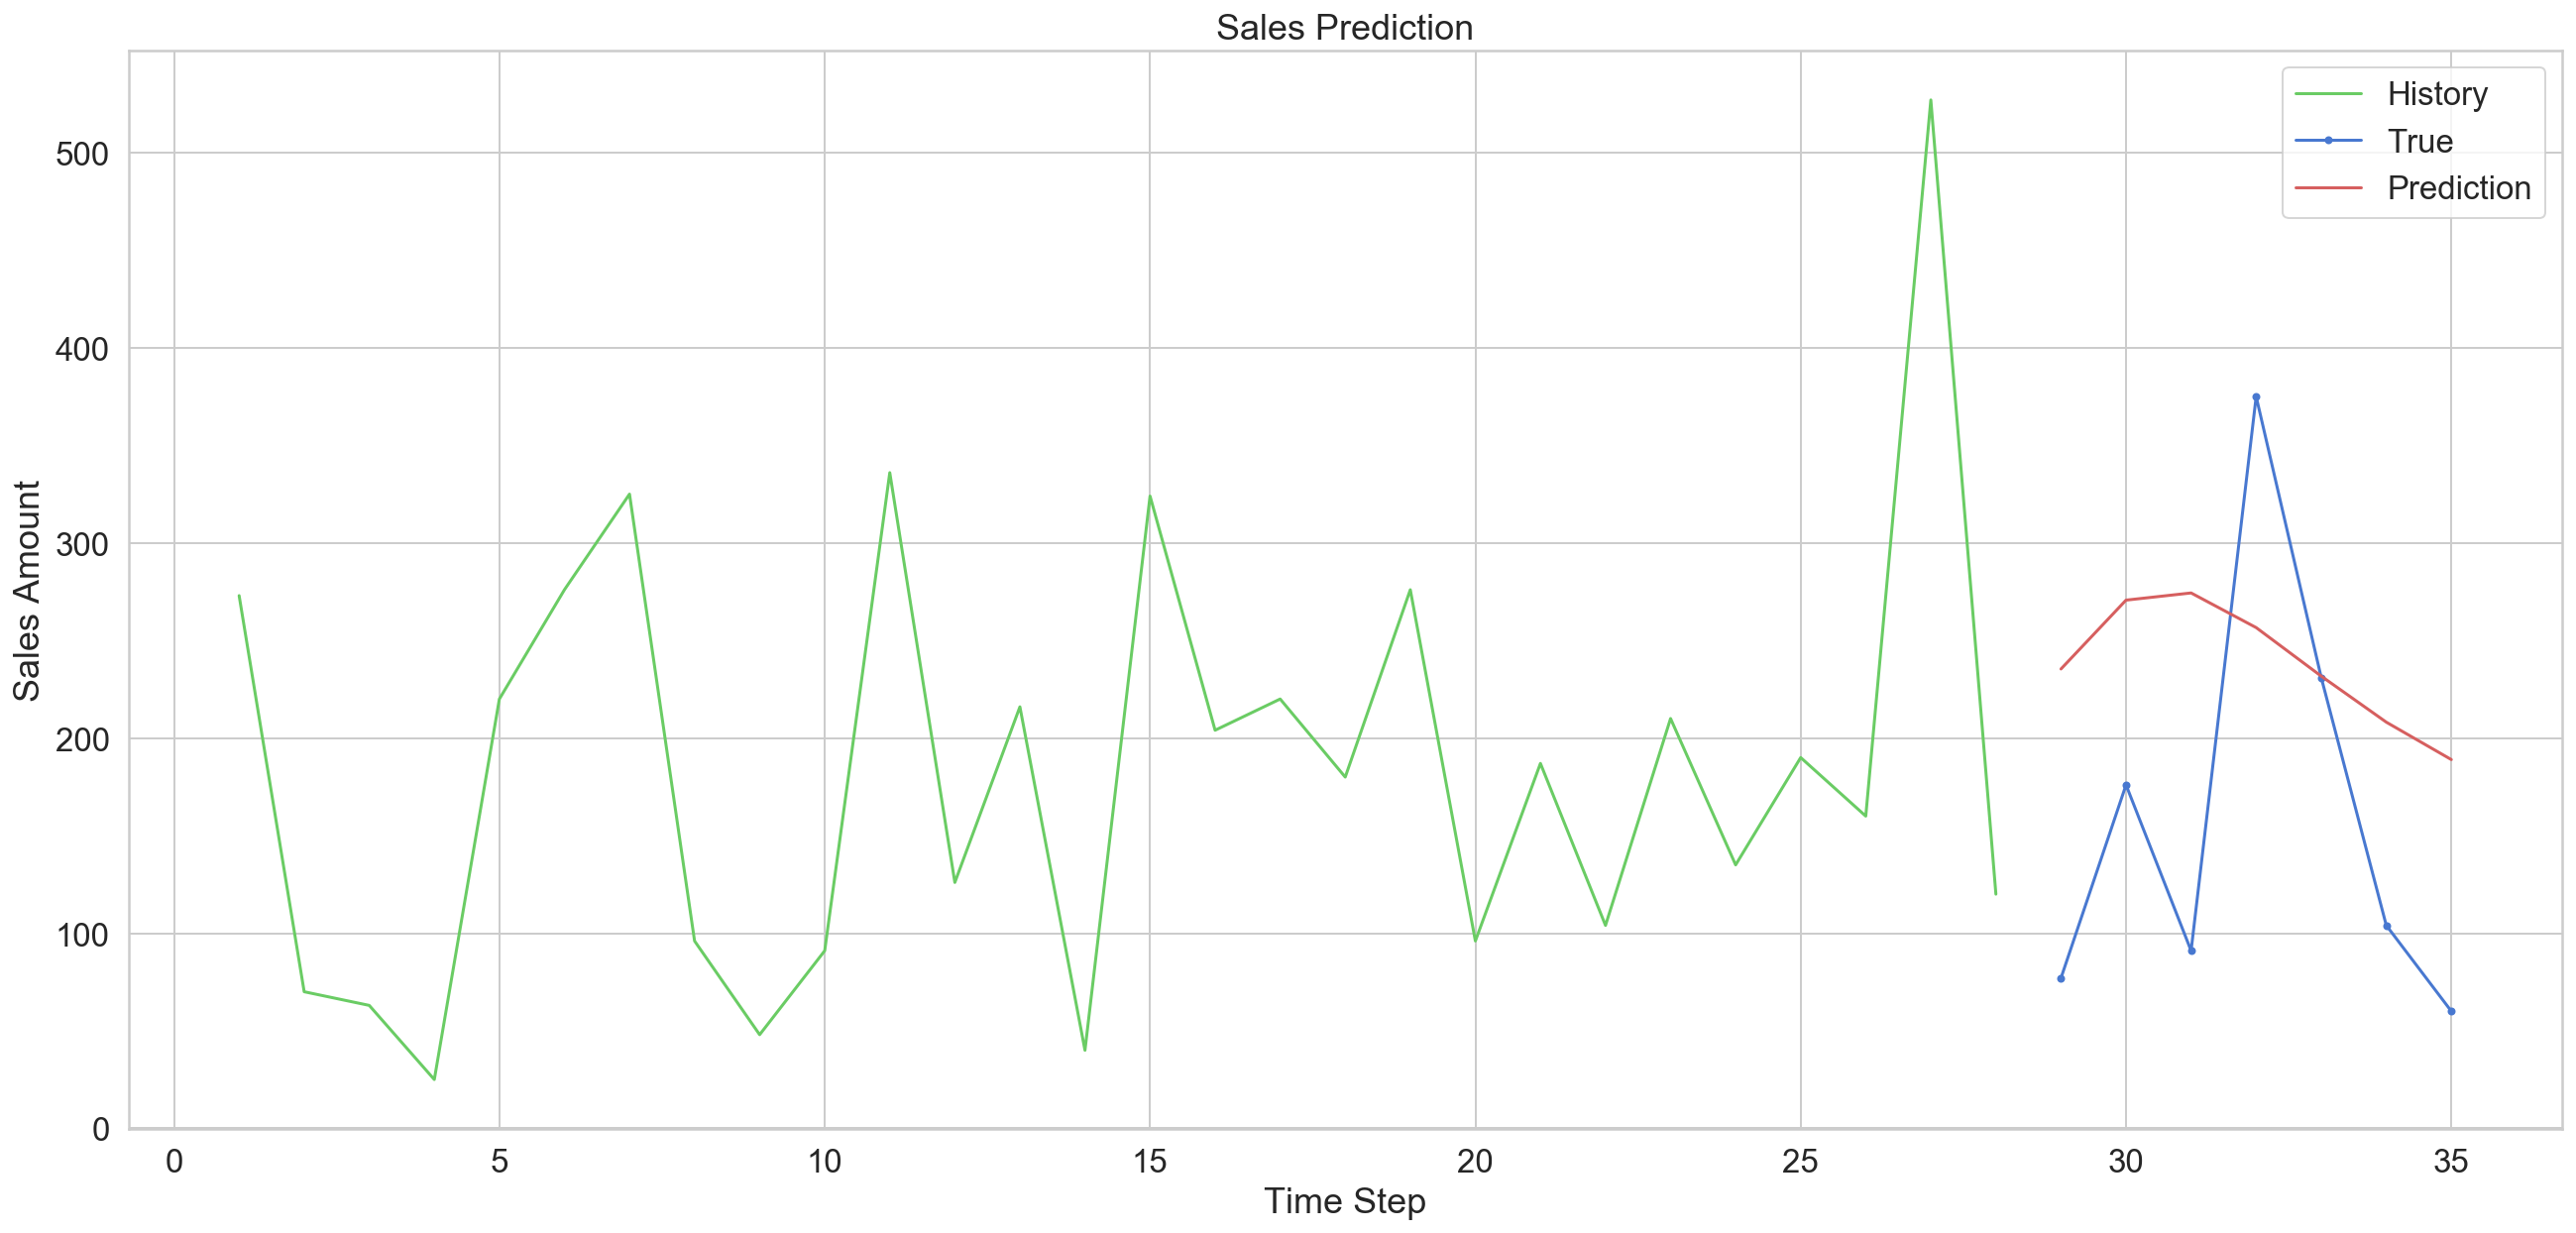

In [174]:
j=0
for i in X_test_inv:
    plt.plot( np.arange(1, len(i)+1),i[:,0], 'g', label="History")
    plt.plot(np.arange(len(i)+1, len(i)+1 + y_test_inv.shape[1]), y_test_inv[j][:,0], marker='.', label="True")
    plt.plot(np.arange(len(i)+1, len(i)+1+ y_test_inv.shape[1]), y_pred_inv[j][:,0], 'r', label="Prediction")
    plt.ylabel('Sales Amount')
    plt.xlabel('Time Step')
    plt.title('Sales Prediction')
    plt.legend()
    plt.show();
    if j==3:
        break
    j+=1

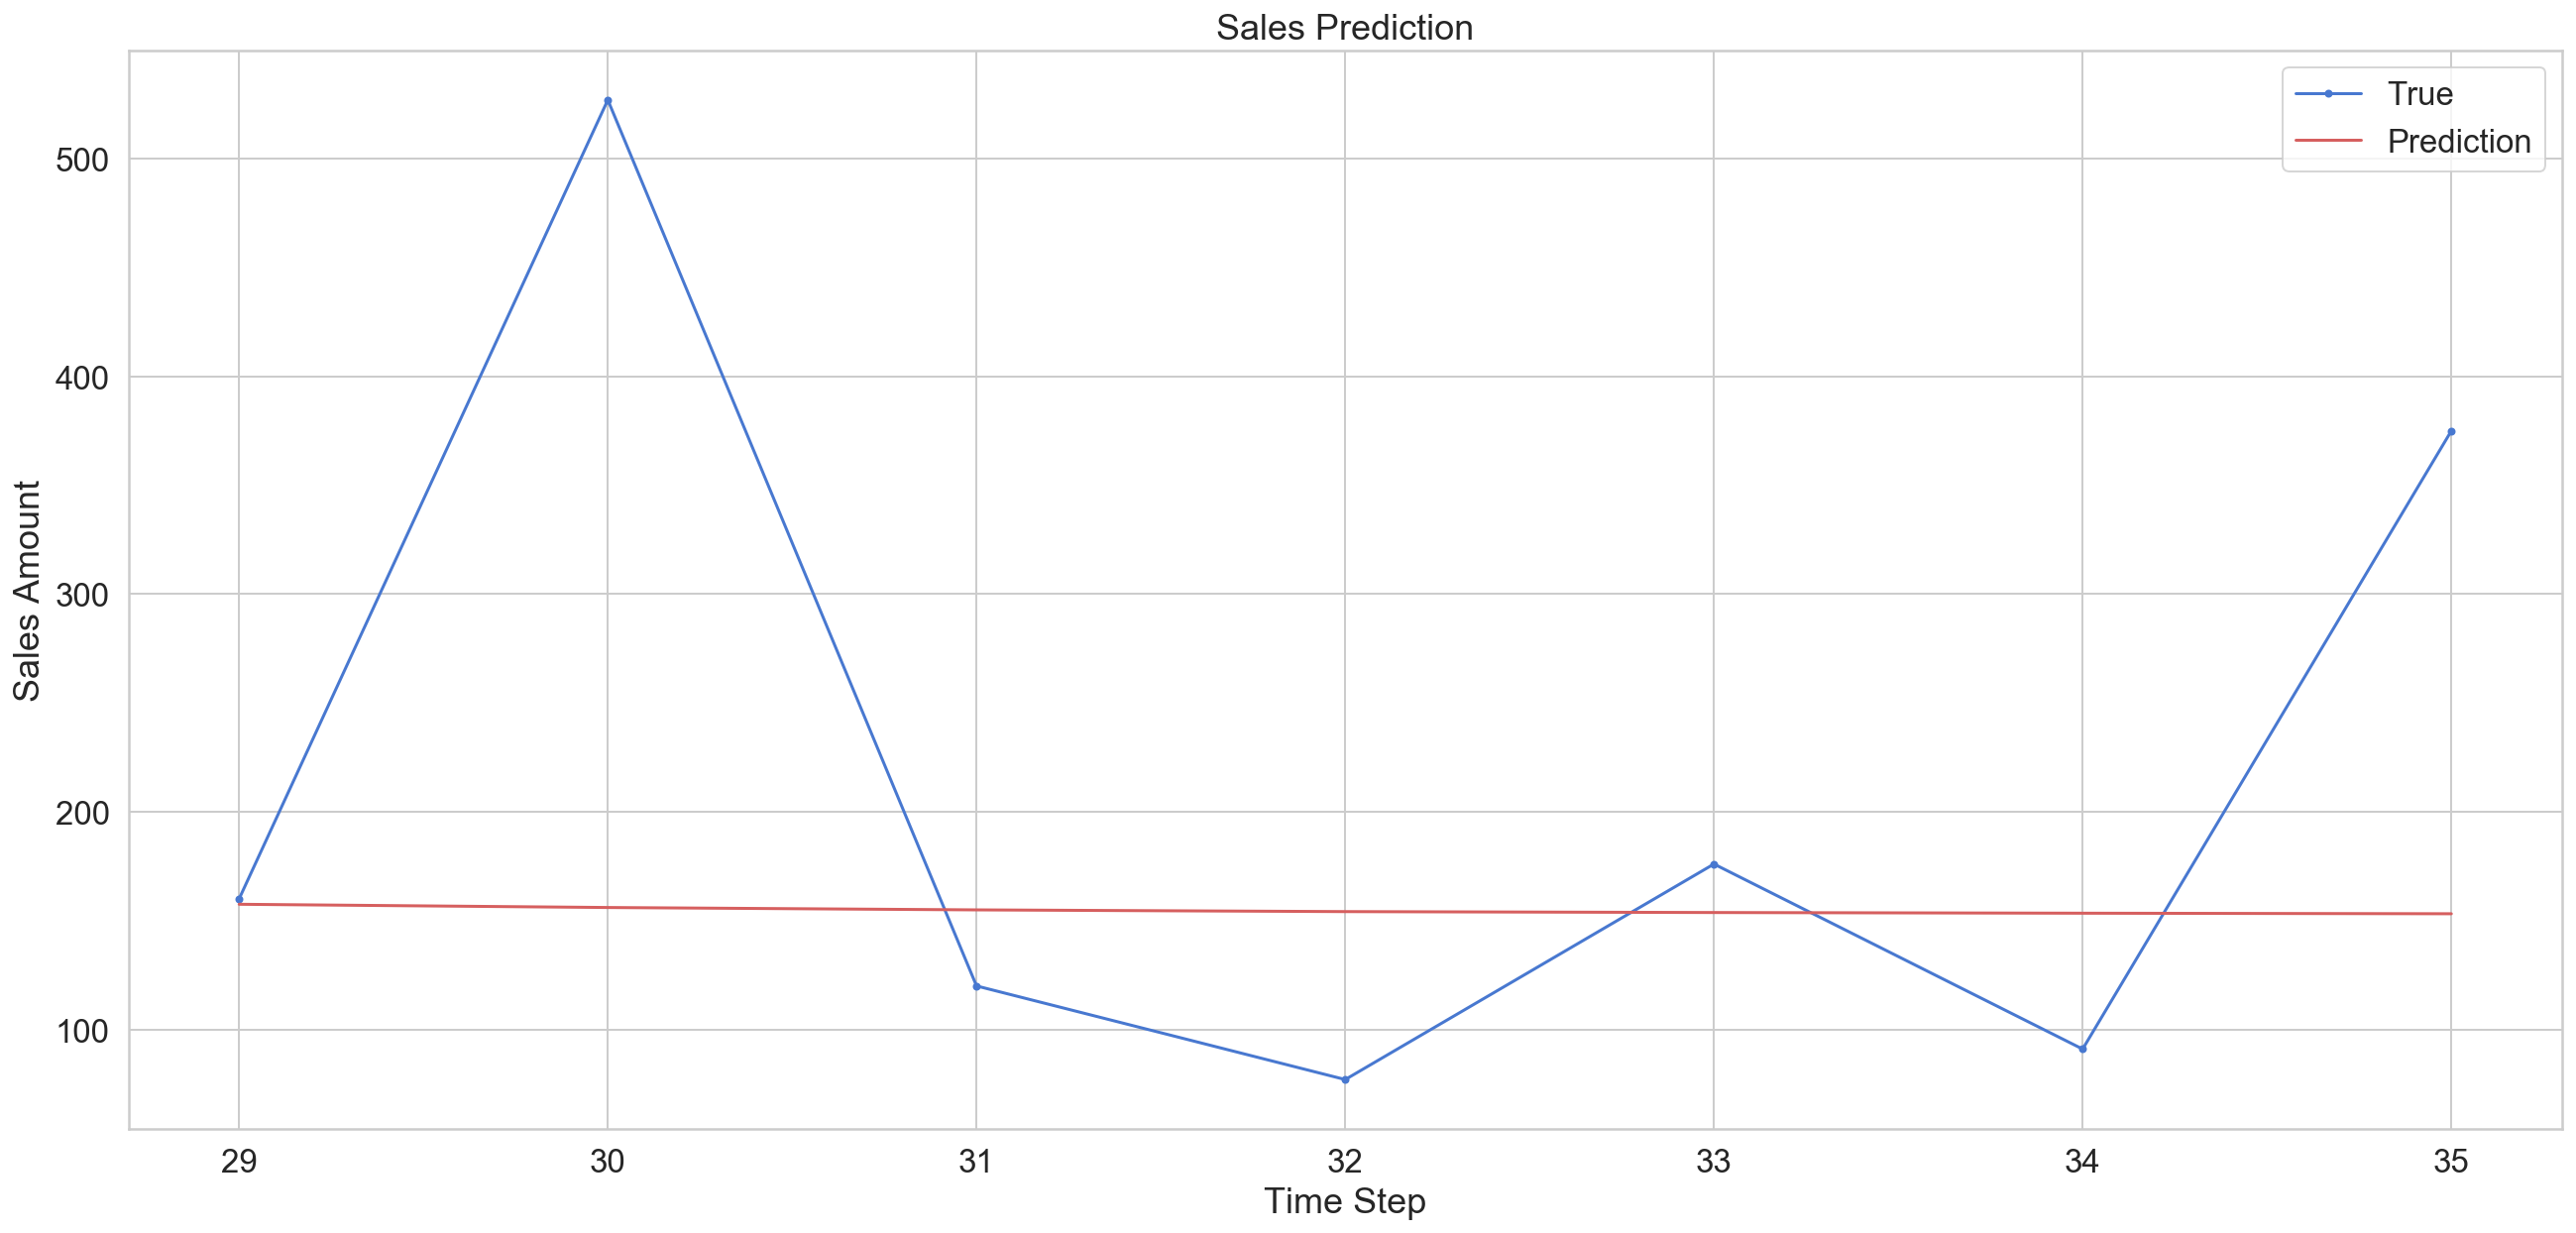

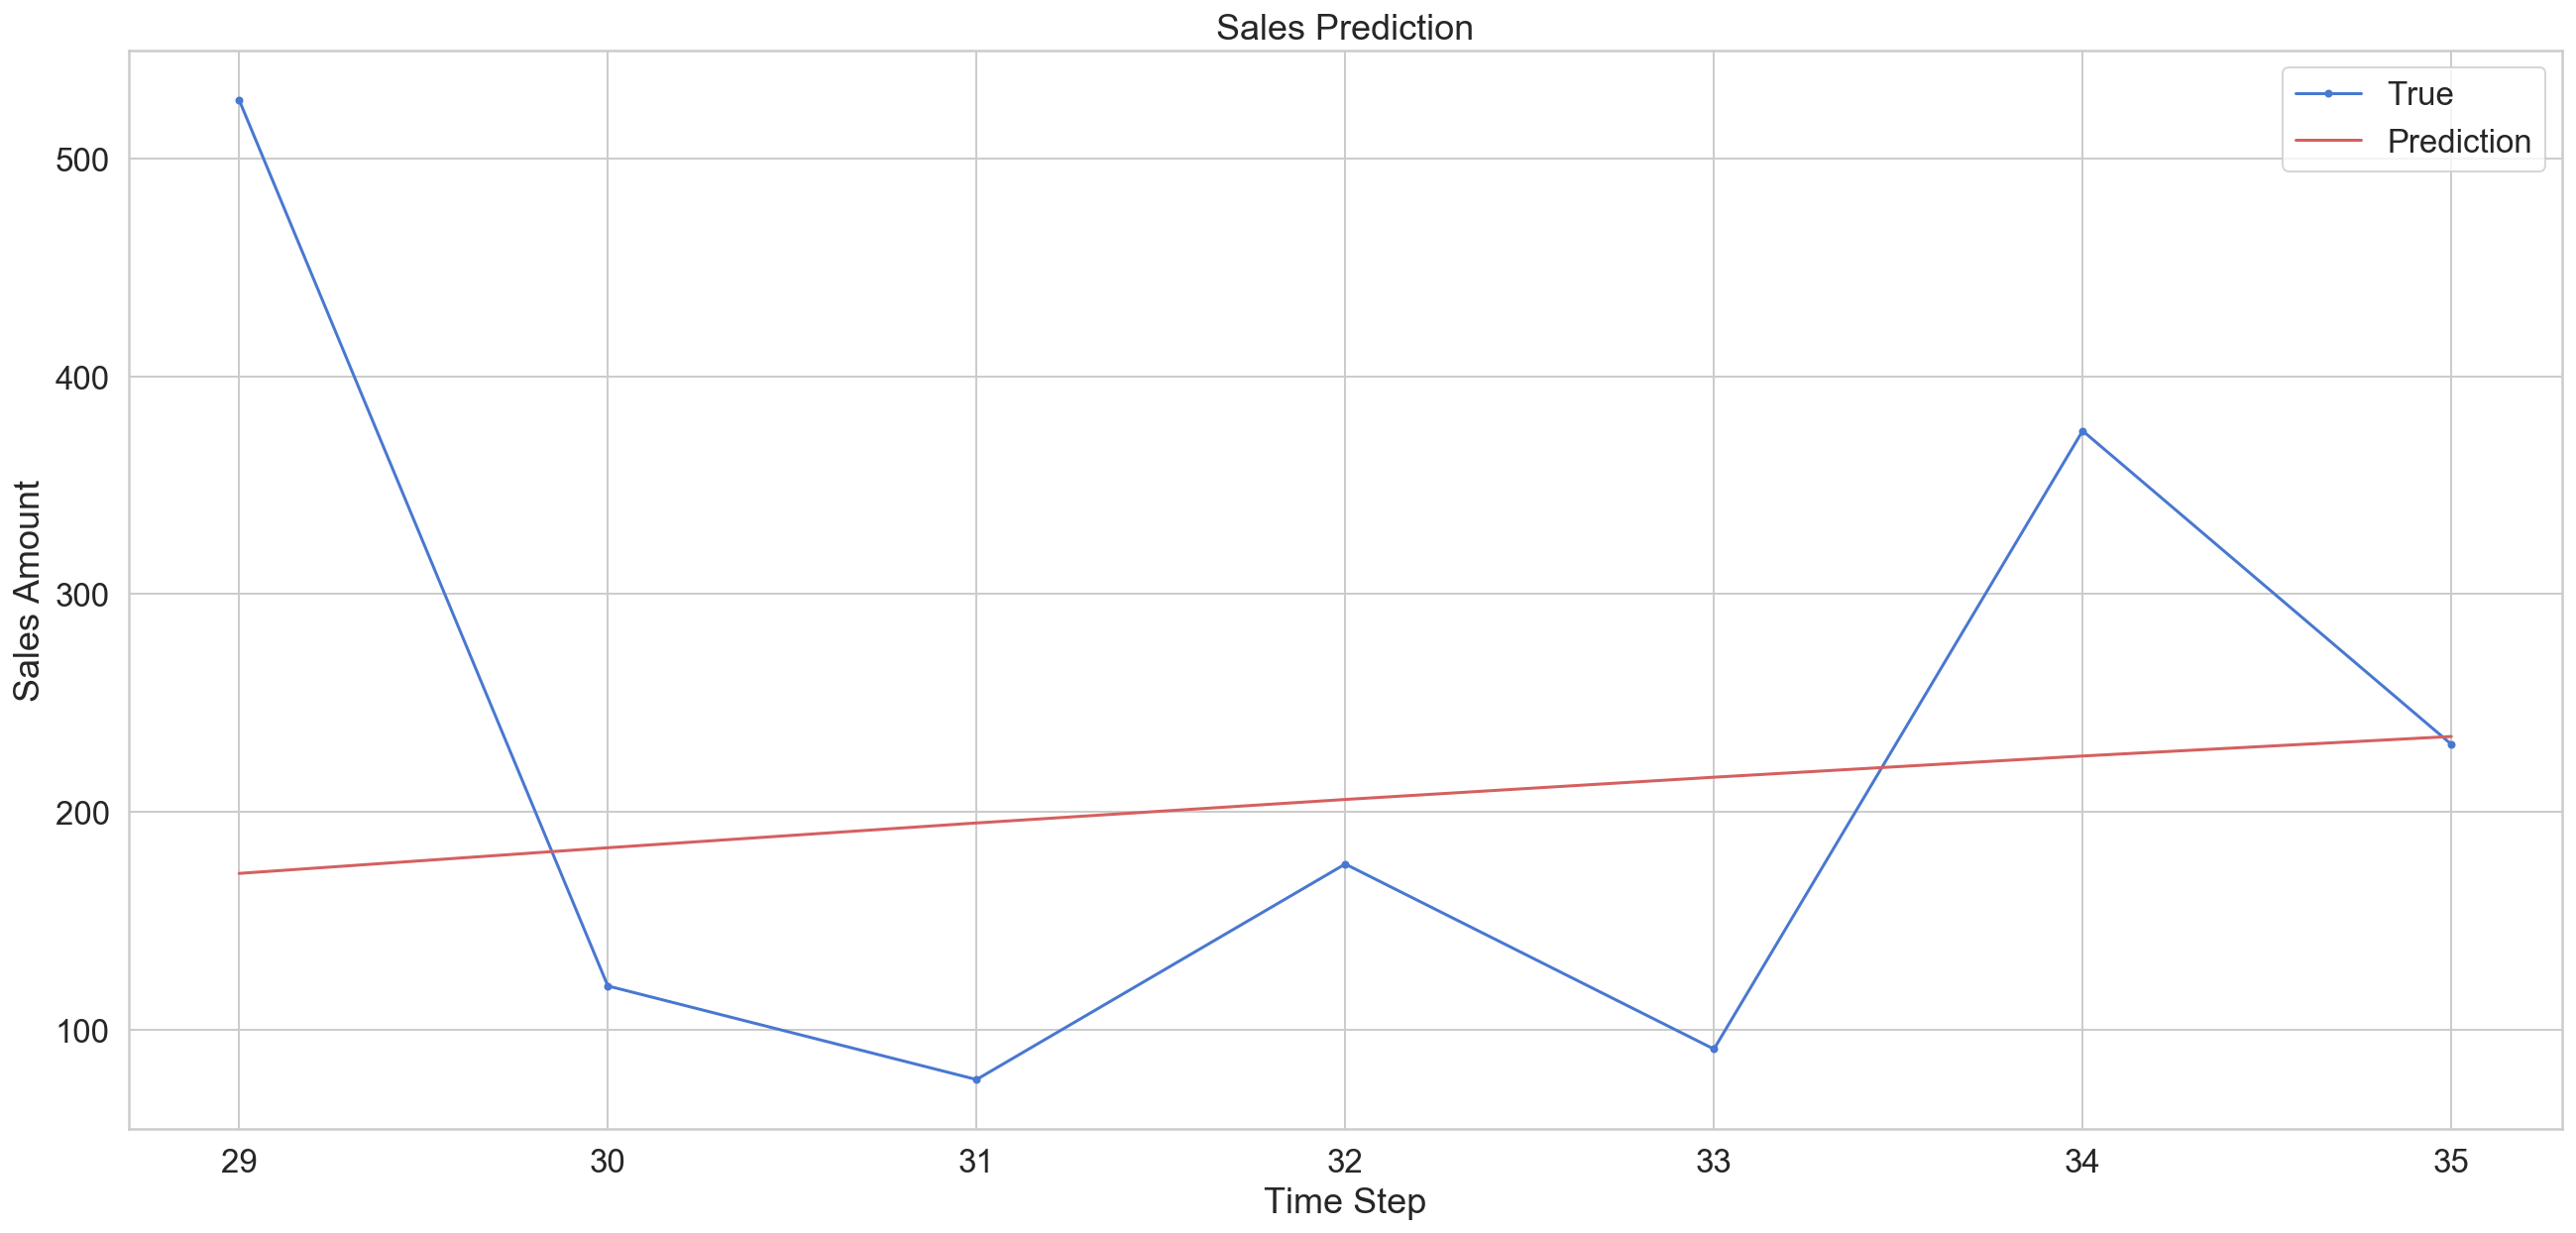

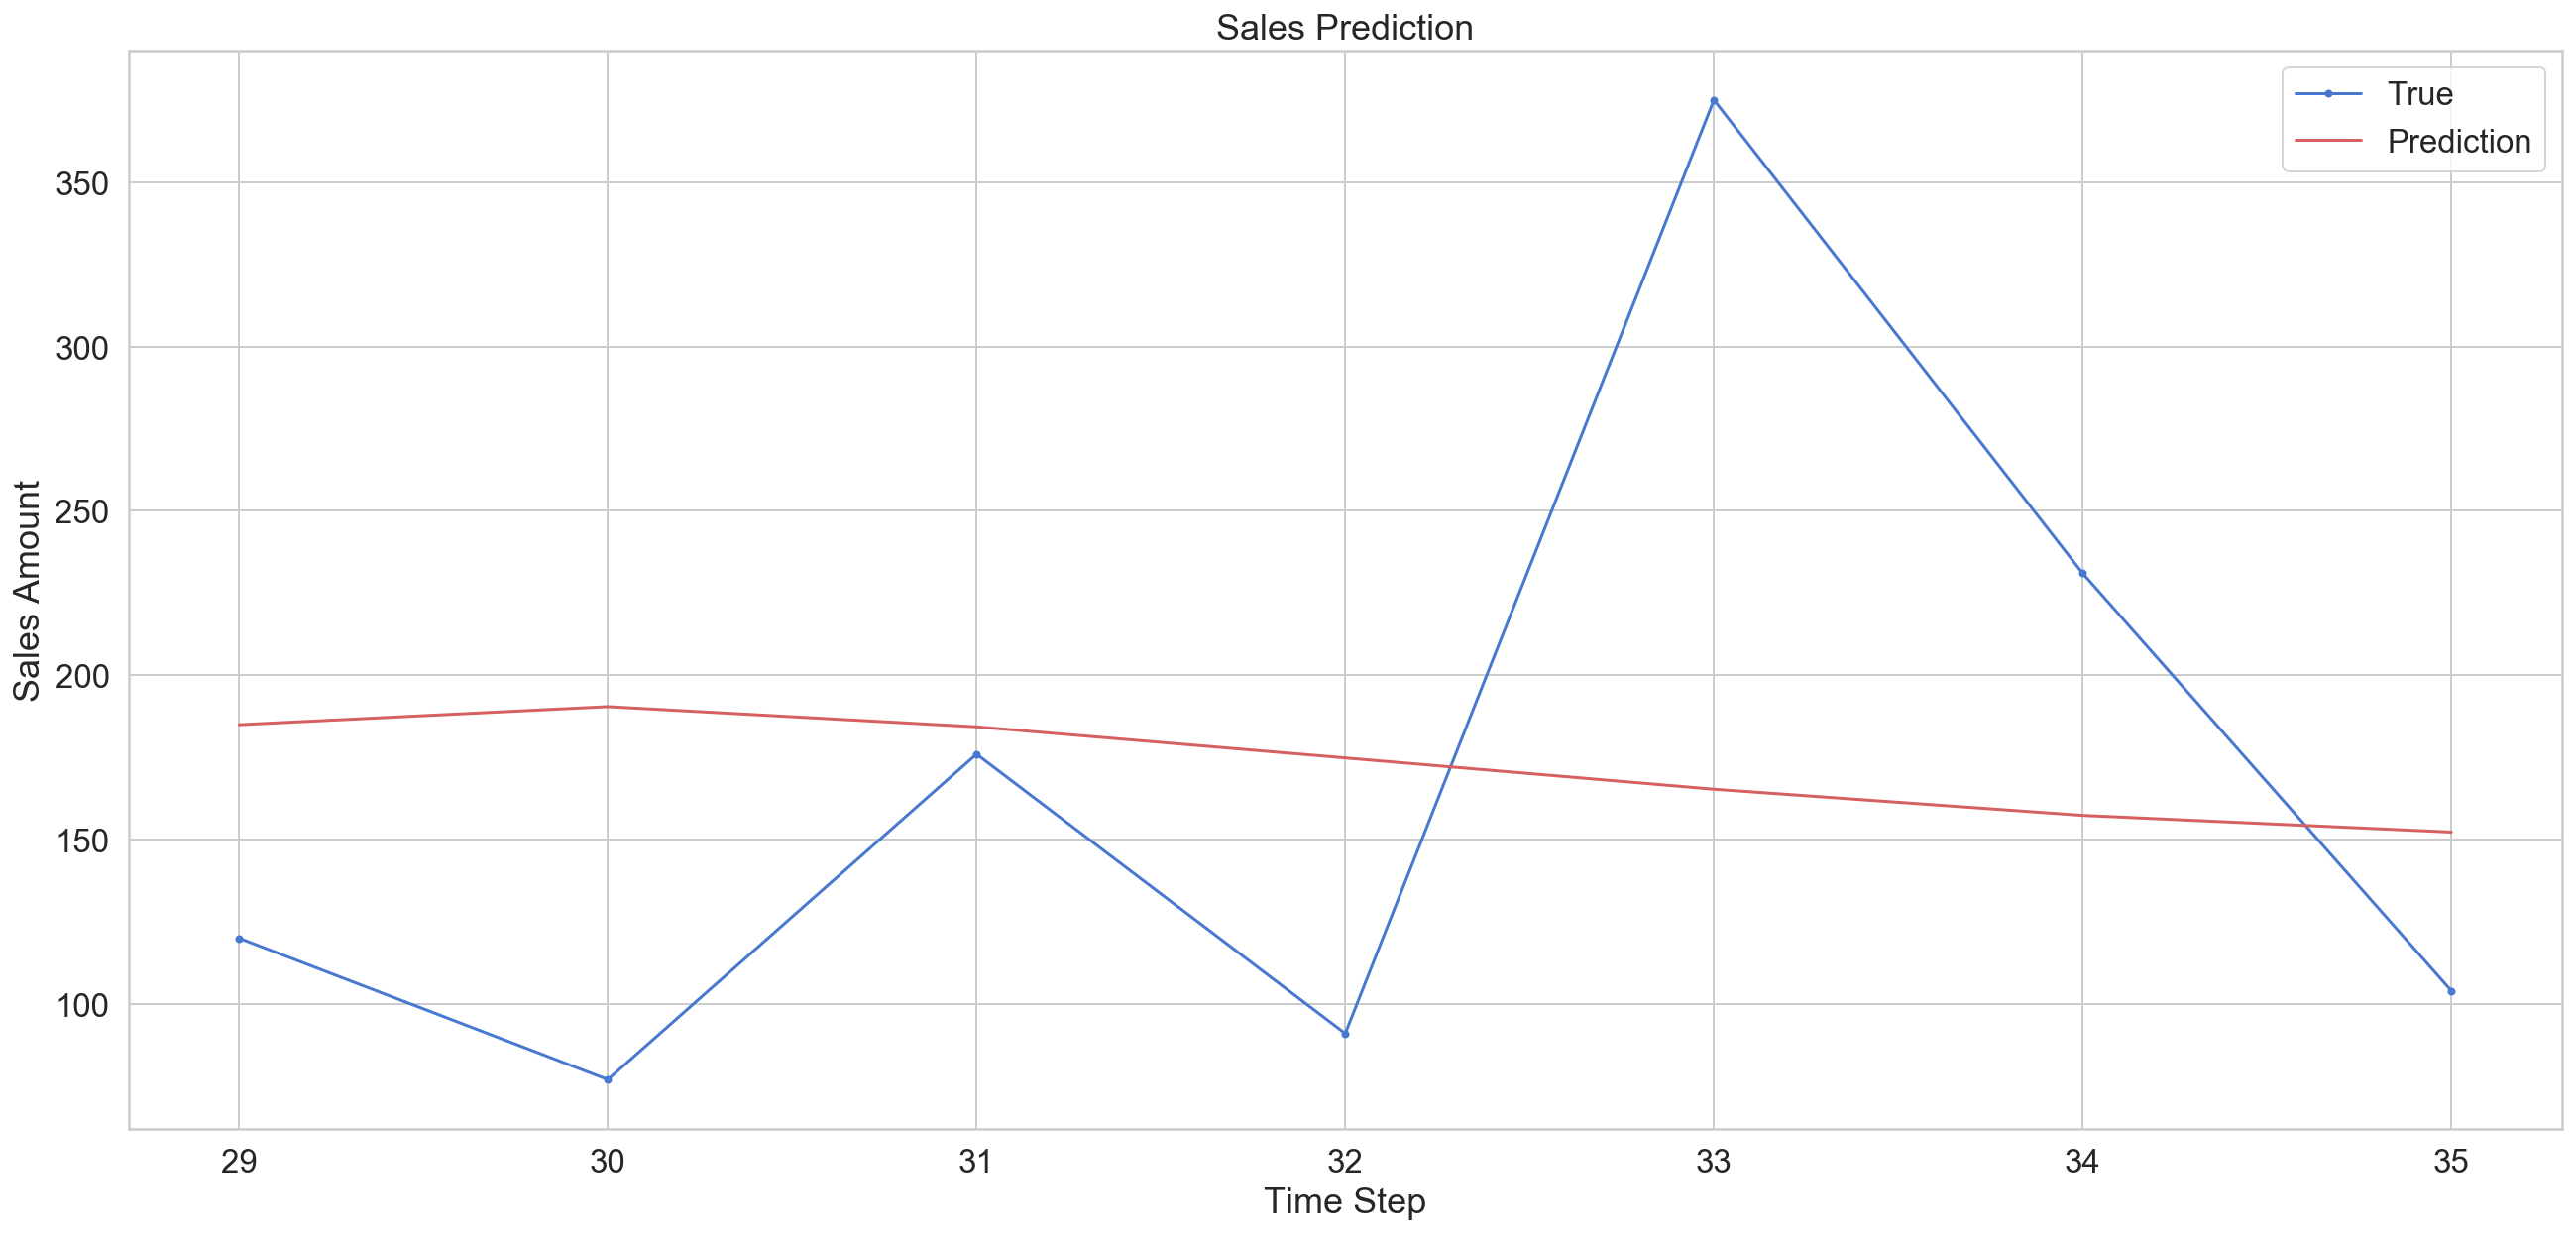

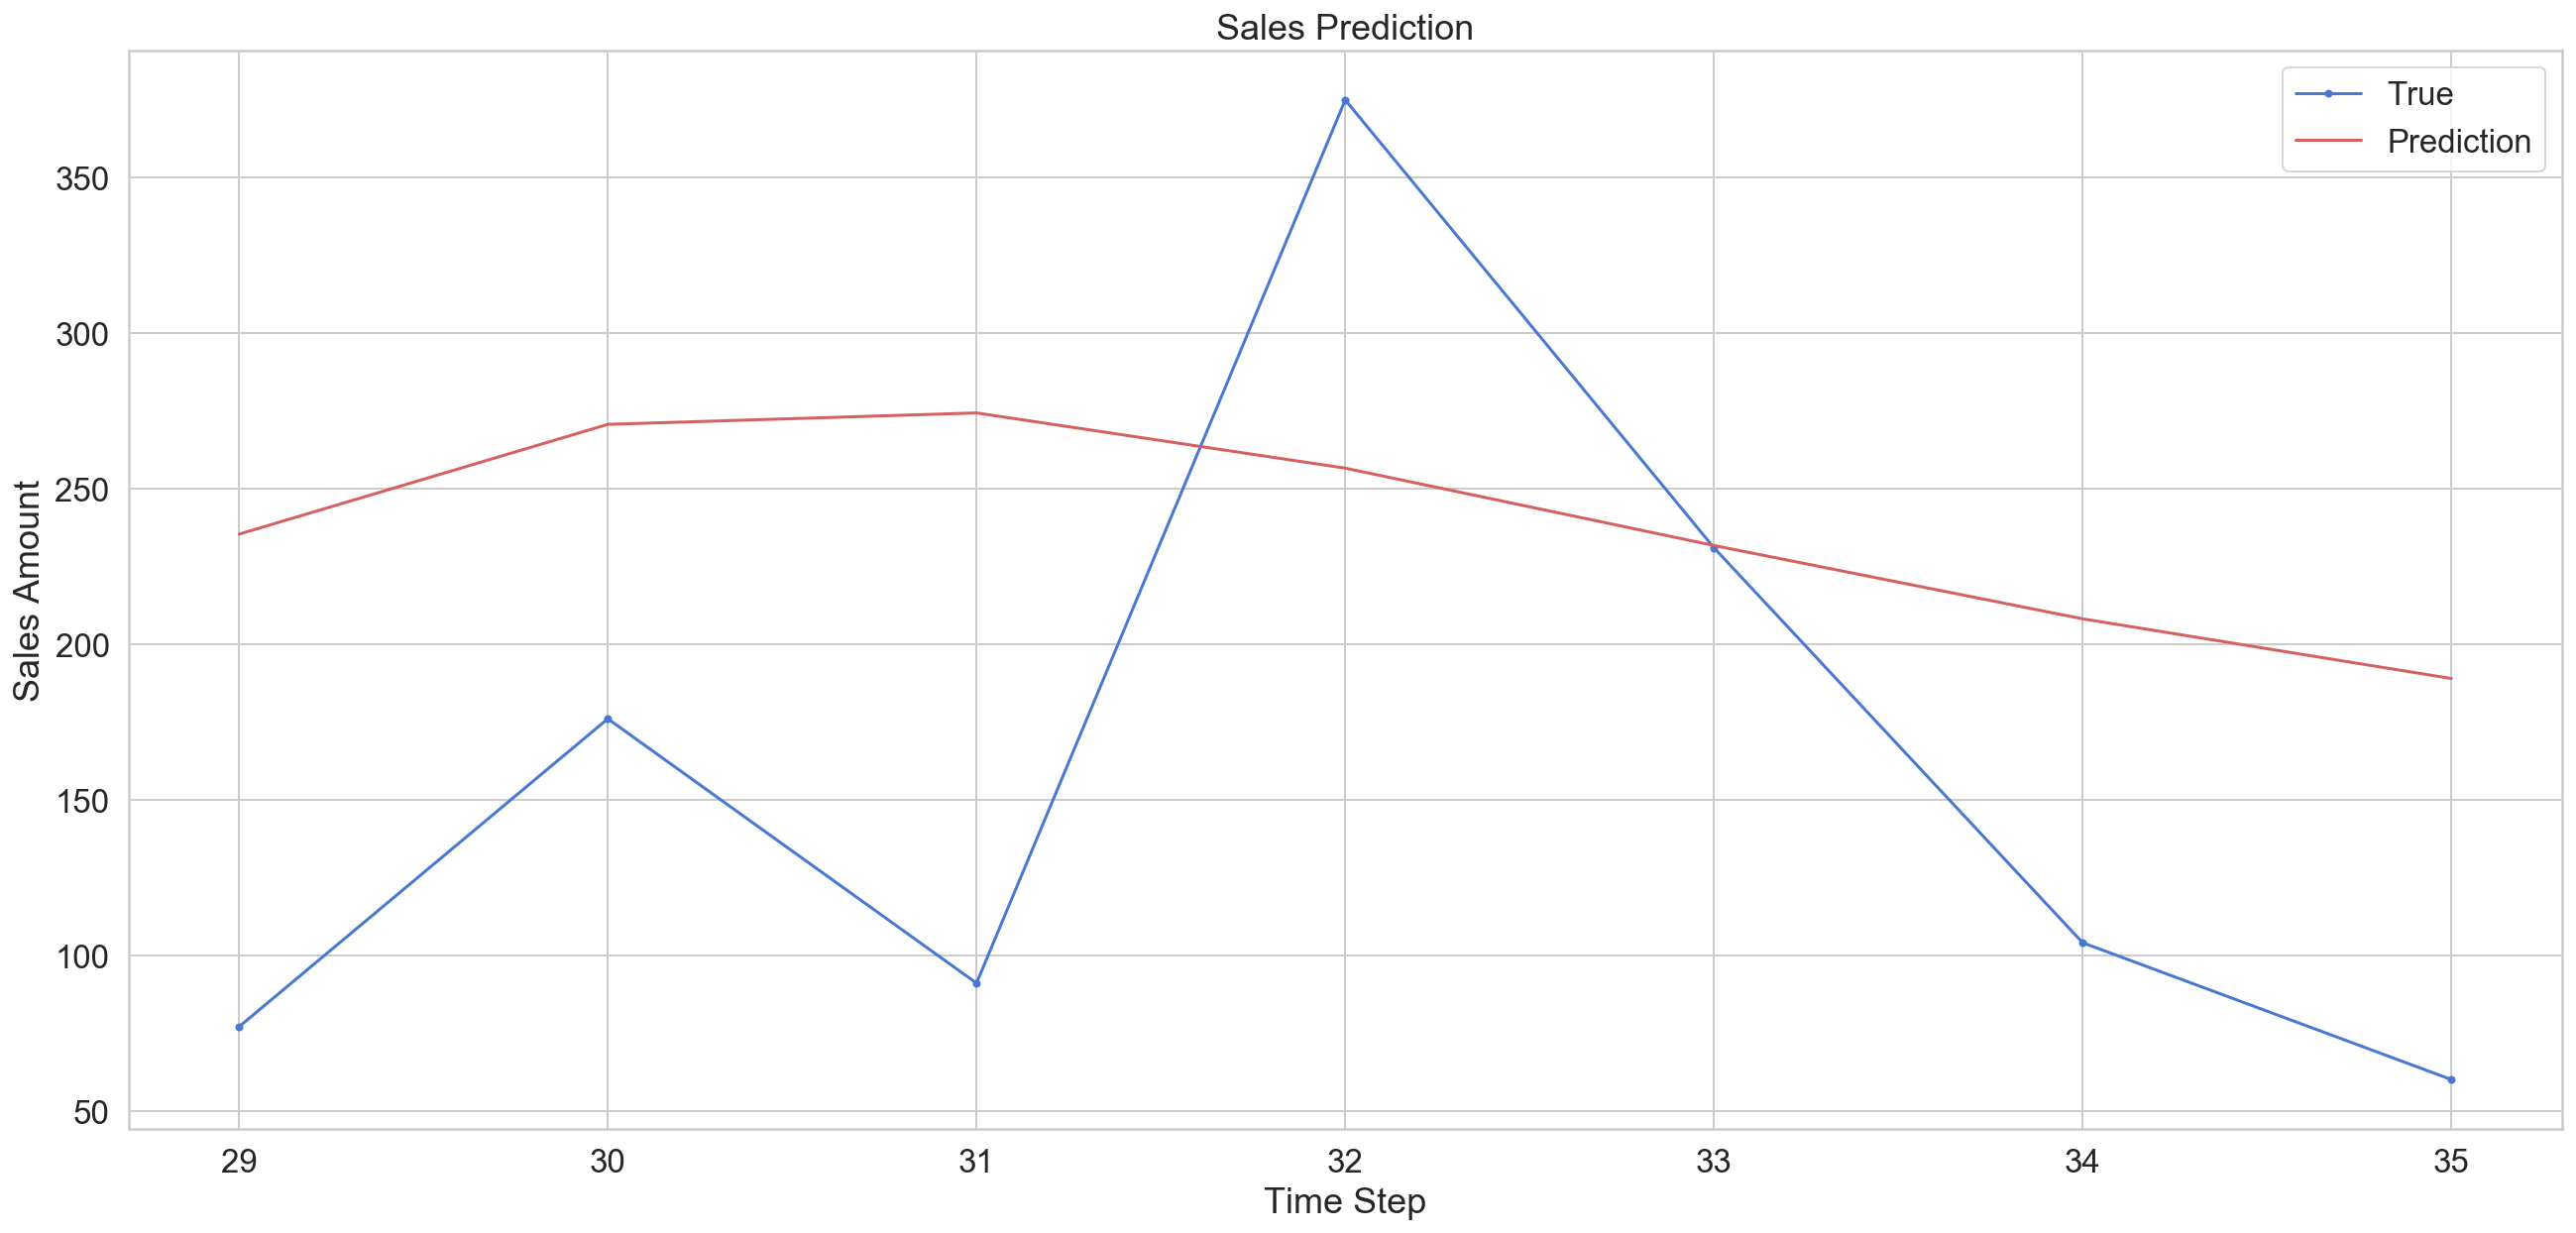

In [175]:
j=0
for i in X_test_inv:
    plt.plot(np.arange(len(i)+1, len(i)+1 + y_test_inv.shape[1]), y_test_inv[j][:,0], marker='.', label="True")
    plt.plot(np.arange(len(i)+1, len(i)+1+ y_test_inv.shape[1]), y_pred_inv[j][:,0], 'r', label="Prediction")
    plt.ylabel('Sales Amount')
    plt.xlabel('Time Step')
    plt.title('Sales Prediction')
    plt.legend()
    plt.show();
    if j==3:
        break
    j+=1

In [176]:
MSE=mean_squared_error(y_test_inv[:,0], y_pred_inv[:,0])
print(f'Mean squared error : {MSE}') 

Mean squared error : 19095.11349097258


In [177]:
# model.save('SalesPredictionModel2')